In [ ]:
# installing libraries
install.packages('vegan')
install.packages("plotrix")
install.packages("plot3D")

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("Heatplus")
install.packages("reshape")
install.packages("gplots")

In [ ]:
install.packages("gplots")

In [1]:
library(MASS)
library(vegan)
library(ggplot2)
library(plotrix)
library("plot3D")
library (Heatplus)
library(reshape)
library(dplyr)
library(RColorBrewer)
library(gplots)


Warning message:
“package ‘vegan’ was built under R version 3.6.3”
Loading required package: permute

Warning message:
“package ‘permute’ was built under R version 3.6.3”
Loading required package: lattice

This is vegan 2.5-6

Warning message:
“package ‘plot3D’ was built under R version 3.6.3”

Attaching package: ‘dplyr’


The following object is masked from ‘package:reshape’:

    rename


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gplots’


The following object is masked from ‘package:plotrix’:

    plotCI


The following object is masked from ‘package:stats’:

    lowess




## epi- and endophytic communities across the samplesing months, we performed PERMANOA

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))

map<-read.table("F649_R889_map_r_MS.csv",row.names=1,sep=",",header=T)
# map<-map[map$Epi_Endo=="Endo" & map$Face=="S",]
map<-map[map$Canopy=="South" & map$sample_type=="Epiphytes" ,]
#map<-map[map$Epi_Endo=="Epi",]


#write.table(map,"map.txt",sep="\t",quote=FALSE)
#map<-read.table("map.txt",header=T,row.names=1,sep="\t")
#map<-map[map$Tree=="284",]

x<-subset(otu[rownames(map),])
x_bind<-cbind(map,x)
write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
x<-x[,!!colSums(x)]

#l_Canopy<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Canopy,permutation=999, distance="bray")
# l_Season<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$season,permutation=999, distance="bray")
# l_Month<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Month,permutation=999, distance="bray")
 #l_Canopy
# l_Season
# l_Month

x<-decostand(x,method="total")
x1<-(as.matrix((vegdist(x,distance="bray", binary=F,upper=F,na.rm=T))))

# canopy_epi
#adonis2(x1 ~ Canopy*month, data = x_bind,permutation=999,method="bray")
#month_south
#adonis2(x1 ~ Epi_Endo*month*tree_species, data = x_bind,permutation=999,method="bray")
adonis2(x1 ~ month+season, data = x_bind,permutation=999,method="bray",strata=x_bind$sample_type)

#adonis2(x~x_bind$Face,permutations=999,method="bray")
# adonis2(x1 ~ Month, data = x_bind,permutation=999,method="bray")

#adonis2(x1 ~ Epi_Endo*Month, data = x_bind,permutation=999,method="bray")
# adonis2(x ~ Epi_Endo*Month, data = x_bind,permutation=999)


# adonis2(x~Endo_exo,data=x_bind,permutations=999,method="bray")
#adonis2(x~x_bind$season,permutations=999,method="bray")

#mrpp(dat= x, grouping= x_bind$Face,permutations=999)

In [ ]:
x_bind$Month

In [ ]:
map<-read.table("VPD.txt",row.names=1,sep="\t",header=T)
head(map)
mapt<-map[map$type=="endo" & map$species=="T",]# & map$Endo_exo=="Epi" ,]#& map$Face=="S" ,]#& map$Tree=="23",]
mapr<-map[map$type=="endo" & map$species=="R",]# & map$Endo_exo=="Epi" ,]#& map$Face=="S" ,]#& map$Tree=="23",]
head(mapr)

ggplot(mapr, aes(x = month, y = Observed)) + 
geom_boxplot(data = mapr,  aes(group = month))

ggplot(mapt, aes(x = month, y = Observed)) + 
geom_boxplot(data = mapt,  aes(group = month))

# ggplot(mapt, aes(x = month, y = Observed,colour=type)) + 
# geom_boxplot(data = mapt,  aes(group = interaction(month, type)))

# ggplot(mapr, aes(x = month, y = Observed,colour=type)) + 
# geom_boxplot(data = mapr,  aes(group = interaction(month, type)))
# ggplot(mapr, aes(x = month, y = vpd)) + geom_line(color = "blue")

In [ ]:
library(readxl)

In [ ]:
map<-read.table("VPD.txt",row.names=1,sep="\t",header=T)
mapt<-map[map$type=="epi" & map$species=="T",]# & map$Endo_exo=="Epi" ,]#& map$Face=="S" ,]#& map$Tree=="23",]
mapr<-map[map$type=="epi" & map$species=="R",]# & map$Endo_exo=="Epi" ,]#& map$Face=="S" ,]#& map$Tree=="23",]
head(map)
#mapt<-data.frame(mapt)
# vpd<-data.frame(mapr$vpd,mapr$chao1,mapr$vpd)
# colnames(vpd)<-c("month","chao1","vpd")
# head(vpd)
# lmHeight = lm(vpd~chao1, data = vpd)
# summary(lmHeight)

#pdf("r_epi_chao1.pdf")
ggplot(mapr, aes(x = month, y = Observed)) + 
  geom_boxplot(data = mapr,  aes(group = month))
ggplot(mapr, aes(x = month, y = vpd)) + geom_line(color = "blue")

#dev.off()

In [ ]:
pdf("r_epi_chao1.pdf")
ggplot(mapr, aes(x = month, y = Observed)) + 
  geom_boxplot(data = mapr,  aes(group = month))
ggplot(mapr, aes(x = month, y = vpd)) + geom_line(color = "blue")
dev.off()

In [ ]:
map<-read.table("VPD.txt",row.names=1,sep="\t",header=T)
head(map)
mapt<-map[map$type=="endo" & map$species=="T",]# & map$Endo_exo=="Epi" ,]#& map$Face=="S" ,]#& map$Tree=="23",]
mapr<-map[map$type=="endo" & map$species=="R",]# & map$Endo_exo=="Epi" ,]#& map$Face=="S" ,]#& map$Tree=="23",]

#mapt<-data.frame(mapt)
vpd<-data.frame(mapt$month,mapt$chao1,mapt$vpd)
colnames(vpd)<-c("month","chao1","vpd")
head(vpd)


In [ ]:

#pdf("r_chao1.pdf")
ggplot(mapt, aes(x = month, y = Observed)) + 
geom_boxplot(data = mapt,  aes(group = month))
ggplot(mapr, aes(x = month, y = vpd)) + geom_line(color = "blue")
#dev.off()

In [ ]:
# boxplot(map$chao1~ map$month, groupby=map$species)
boxplot(chao1~ month,data=mapt,col="blue")
lineplot(vpd~month,data=mapt)
boxplot(vpd~ month,data=mapt,col="blue")

# boxplot(chao1~ month,data=mapr,col="red")

# boxplot(Observed~ month,data=mapt,col="blue")
# boxplot(Observed~ month,data=mapr,col="red")

# ggplot(map,aes(month,chao1,fil=factor(species)))+
# geom_boxplot()
# boxplot(map$simpson~ map$month)
# boxplot(map$Observed~ map$month)
# boxplot(map$shannon~ map$month)


In [ ]:
map<-read.table("div.txt",row.names=1,sep="\t",header=T)
map<-map[map$type=="endo",]# & map$Endo_exo=="Epi" ,]#& map$Face=="S" ,]#& map$Tree=="23",]

head(map)

In [ ]:
pdf("div.pdf")
xyplot(map$classifed~ map$chao1,group=map$type, col=c("red","blue"),cex=1.5)
xyplot(map$classifed~ map$simpson,group=map$type, col=c("red","blue"),cex=1.5)
xyplot(map$classifed~ map$Observed,group=map$type, col=c("red","blue"),cex=1.5)
xyplot(map$classifed~ map$shannon,group=map$type, col=c("red","blue"),cex=1.5)
dev.off()


In [ ]:
## figure 6

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",row.names=1,na.strings = "NA",fill=T)
write.table(otu,"x.txt",sep=",",quote=FALSE)
otu <- read.csv("x.txt", header=T, na.strings="")
otu<-otu[ rowSums(otu[,1:(dim(otu)[2]-7)]) >= 10, ]
otu<-otu[,1:(dim(otu)[2]-2)]
 otu$expected2<-apply(otu[,1:(dim(otu)[2])],1,
                      function(x) last(na.omit(x)
                                      )
                     )
 otu<-aggregate(otu[,1:(dim(otu)[2]-6)],by=list(otu$expected2),FUN=sum)

In [ ]:
head(otu)

In [ ]:
##phylum

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",row.names=1,na.strings = "NA",fill=T)
write.table(otu,"x.txt",sep=",",quote=FALSE)
otu <- read.csv("x.txt", header=T, na.strings="")
otu<-otu[ rowSums(otu[,1:(dim(otu)[2]-7)]) >= 10, ]
otu<-otu[,1:(dim(otu)[2]-5)]
otu$expected2<-apply(otu[,1:(dim(otu)[2])],1,
                     function(x) last(na.omit(x)
                                     )
                     )
otu<-aggregate(otu[,1:(dim(otu)[2]-3)],by=list(otu$expected2),FUN=sum)


In [ ]:
# otu<-read.table("core_all_R.txt",header=T,sep="\t",row.names=1,na.strings = "NA",fill=T)
# write.table(otu,"x.txt",sep=",",quote=FALSE)
# otu <- read.csv("x.txt", header=T, na.strings="")
# otu<-otu[ rowSums(otu[,1:(dim(otu)[2]-7)]) >= 10, ]
# otu<-otu[,1:(dim(otu)[2]-3)]
# otu$expected2<-apply(otu[,1:(dim(otu)[2])],1,
#                      function(x) last(na.omit(x)
#                                      )
#                      )
#otu<-aggregate(otu[,1:(dim(otu)[2]-5)],by=list(otu$expected2),FUN=sum)
row.names(otu)<-otu[,1]
otu<-otu[,-1]
otu<-t(otu)

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$INC=="core_all" & map$Face=="South",]# & map$Endo_exo=="Epi" ,]#& map$Face=="S" ,]#& map$Tree=="23",]

x1<-subset(otu[rownames(map),])
p<-cbind(map,x1)                    
rownames(p)<-p$Description

m<-p[,((dim(map)[2])+1):dim(p)[2]]
m<-m[,!!colSums(m)]
m<-decostand(m,method="total")   

maxab <- apply(m, 2, max)                 
n1 <- names(which(maxab < 0.05))
mat<- as.matrix(m[, -which(names(m) %in% n1)])
mat<-mat*100
data.dist <- vegdist((mat), method = "bray")
row.clus <- hclust(data.dist, "complete")
data.dist.g <- vegdist(t(mat), method = "bray")
col.clus <- hclust(data.dist.g, "complete")

#pdf("endo_heatmap.pdf")
plot(annHeatmap2(mat,
                 col = colorRampPalette(c("lightyellow", "red"),space = "rgb")(67),
                 breaks = 54,
                 dendrogram = list(Row = list(dendro = as.dendrogram(row.clus)),
                                   Col = list(dendro = as.dendrogram(col.clus))),
                 legend = 3,
                 labels = list(Col = list(nrow = 0.002)),
                 ann = list(Row = list(data = map$Month))
                )
    )
#dev.off()


In [ ]:
pdf("xxepi_heatmap.pdf")

plot(annHeatmap2(mat,
                 col = colorRampPalette(c("lightyellow", "red"),space = "rgb")(46),
                 breaks = 54,
                 legend = 3,
                 labels = list(Col = list(nrow = 3)),
                 ann = list(Row = list(data = p$Species)),
                 scale="none")
     )
dev.off()


In [ ]:
hm <- heatmap.2(mat, scale="none",
cexRow=0.75, cexCol=1.0, key=TRUE, keysize=1.5,
margins=c(10,22),
trace="none")

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",row.names=1,na.strings = "NA",fill=T)
write.table(otu,"x.txt",sep=",",quote=FALSE)
otu <- read.csv("x.txt", header=T, na.strings="")
otu<-otu[ rowSums(otu[,1:(dim(otu)[2]-7)]) >= 10, ]
otu<-otu[,1:(dim(otu)[2]-5)]
otu$expected2<-apply(otu[,1:(dim(otu)[2])],1,function(x) last(na.omit(x)))
otu<-aggregate(otu[,1:(dim(otu)[2]-3)],by=list(otu$expected2),FUN=sum)
row.names(otu)<-otu[,1]
otu<-otu[,-1]
otu<-t(otu)
t_otus<-decostand(otu,method="total")                  
map<-read.table("F649_R889_map_r2_MS2.csv",row.names=1,sep=",",header=T)
map<-map[map$INC=="core_all" & map$Endo_exo=="Endo"& map$Species=="T" & map$Tree=="300",]
                     
x1<-subset(t_otus[rownames(map),])
p<-cbind(map,x1)                    
rownames(p)<-p$Description


                     
ppp_exo<-pp_exo[,!!colSums(pp_exo)]
ppp_exo<-decostand(ppp_exo,method="total")
                     
                     
m<-p[,((dim(map)[2])+1):dim(p)[2]]

                     
maxab <- apply(m, 2, max)                 
n1 <- names(which(maxab < 0.01))
mat<- as.matrix(m[, -which(names(m) %in% n1)])



data.dist <- vegdist((mat), method = "bray")
row.clus <- hclust(data.dist, "complete")
data.dist.g <- vegdist(t(mat), method = "bray")
col.clus <- hclust(data.dist.g, "complete")

plot(annHeatmap2(mat,
                 col = colorRampPalette(c("lightyellow", "red"),space = "rgb")(55),
                 breaks = 54,
                 dendrogram = list(Row = list(dendro = as.dendrogram(row.clus)),
                                   Col = list(dendro = as.dendrogram(col.clus))),
                 legend = 3,
                 labels = list(Col = list(nrow = 12)),
                 ann = list(Row = list(data = p$Month))
                )
    )

In [ ]:
x=annHeatmap(mat, ann,
             dendrogram = list(row.clus,data.dist,Col = list(status = "yes"),Row = list(status = "hidden")),
             col = colorRampPalette(c("lightyellow", "red"),space = "rgb")(42), breaks = 43,legend=3)

plot(x)

x=annHeatmap((mat), ann,
             dendrogram = list(row.clus,data.dist,Col = list(status = "yes")),
             col = colorRampPalette(c("lightyellow", "red"),space = "rgb")(42), breaks = 43,legend=3)

plot(x)



In [ ]:
x<-list(row.clus,data.dist,Col = list(status = "yes"),Row = list(status = "hidden"))
x
# list(clustfun = hclust, distfun = dist, Col = list(status = "yes")

## Figure 5A

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
t_otus<-decostand(t_otus,method="total")

map<-read.table("F649_R889_map_r_MS.csv",row.names=1,sep=",",header=T)
map2<-map[map$INC=="core_all",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")

p<-p[p$sample_type=="Epiphytes",]
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
pp<-p[,((dim(map2)[2])+1):dim(p)[2]]
ppp<-pp[,!!colSums(pp)]
l<-anosim((as.matrix((vegdist(ppp,distance="bray")))),grouping=p$tree_species)
l



colfunc<-colorRampPalette(c("blue", "red","green"))
#pdf("CCA_exo.pdf")
ab<-cca(ppp~VPD+Humidity+Precipitation+Temperature+GI+RI,p)
plot(ab,type="n",scaling=1)
with(ppp,points(ab,display="sites",col="gray",pch=3,lwd=0.1,scaling=1))
with(ppp,points(ab,col=colfunc(3)[p$Canopy],display="sites",scaling=1,pch=unique(as.numeric(p$tree_species))))
fit<-envfit(ab~VPD+Humidity+Precipitation+Temperature+GI+RI,p_exo,strata=p$tree_species)
plot(fit, cex=1.2, axis=TRUE,p.max=0.05)
legend(x=-6.4,y=4.2,legend=unique(p$tree_species),pch=unique(as.numeric(p$tree_species)))
legend(x=-6.4,y=2.2,legend=unique(p$Canopy),col=colfunc(3)[unique(p$Canopy)],pch=c(22))
# #dev.off()
# fit

## Figure 5B

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
t_otus<-decostand(t_otus,method="total")



map<-read.table("F649_R889_map_r_MS.csv",row.names=1,sep=",",header=T)
map2<-map[map$INC=="core_all",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")


p<-p[p$sample_type=="Endophytes",]
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
pp<-p[,((dim(map2)[2])+1):dim(p)[2]]
ppp<-pp[,!!colSums(pp)]

NMDS_bray<-metaMDS(ppp,distance="bray",k=2,trymax=10000,autotransform=F)

l<-anosim((as.matrix((vegdist(ppp,distance="bray")))),grouping=p$tree_species)
zz<-scores(NMDS_bray,display="site")

l<-anosim((as.matrix((vegdist(ppp,distance="bray")))),grouping=p$shedding,strata=p$sample_type)
l


colfunc<-colorRampPalette(c("blue", "red"))
#pdf("CCA_endo.pdf")
ab<-cca(ppp~VPD+Humidity+Precipitation+Temperature+GI+RI,p)
plot(ab,type="n",scaling=1)
with(ppp,points(ab,display="sites",col="gray",pch=3,lwd=0.1,scaling=1))
with(ppp,points(ab,col=colfunc(2)[p$tree_species],display="sites",scaling=1,pch=unique(as.numeric(p$tree_species))))

fit<-envfit(ab~VPD+Humidity+Precipitation+Temperature+GI+RI+month+season,p,strata=p$tree_species)


plot(fit, cex=1.2, axis=TRUE,p.max=0.05)
#text(ab, display="bp",scaling=1)
legend(x=-5.4,y=4.2,legend=unique(p$tree_species),col=colfunc(2)[unique(p$tree_species)],pch=unique(as.numeric(p$tree_species)))
#legend(x=-6.4,y=4.2,legend=unique(p_endo$Species),pch=unique(as.numeric(p_endo$Species)))

#dev.off()
fit

In [ ]:
p$tree_species

In [ ]:
colfunc<-colorRampPalette(c("blue", "red"))
#pdf("CCA_endo.pdf")

#x<-(as.matrix((vegdist(ppp_endo,distance="bray"))))
ab<-cca(ppp_endo~VPD+rain+hum+temp+GI+RI,p_endo)
plot(ab,type="n",scaling=1)
with(ppp_endo,points(ab,display="species",col="gray",pch=3,lwd=0.1,scaling=1))
with(ppp_endo,points(ab,col=colfunc(2)[p_endo$Species],display="sites",scaling=1,pch=unique(as.numeric(p_endo$Species))))
fit<-envfit(ab~VPD+rain+hum+temp+GI+RI+season+season*Species,p_endo,strata=p_endo$Species)
#fit<-envfit(ab~season*Species,p_endo)

plot(fit, cex=1.2, axis=TRUE,p.max=0.05)
#text(ab, display="bp",scaling=1)
legend(x=-6.4,y=4.2,legend=unique(p_endo$Species),col=colfunc(2)[unique(p_exo$Species)])
#legend(x=-6.4,y=4.2,legend=unique(p_endo$Species),pch=unique(as.numeric(p_endo$Species)))

#dev.off()
fit


# scatter3D(zz[,1],zz[,2],p_exo$temp,clab=c("temp","celsius"),xlab="NMDS1",ylab="NMDS2",zlab="min_temp",pch=as.numeric(p_exo$Face))
# legend("topleft",legend=unique(p_exo$Face),pch=unique(as.numeric(p_exo$Face)))
# text(y=-0.45,x=-0.32,label=paste("Canopy p-value=",l_canopy$signif))
# text(y=-0.49,x=-0.32,label=paste("Species p-value=",l_species$signif))
# text(y=-0.53,x=-0.31,label=paste("temp p-value=",l_temp$signif))
# #dev.off(

# A. Epiphytes

# 1.0 Tree canopy (exosphere)

###     1.1.1 R284 differnt canopy

In [ ]:
library(phyloseq)
library(devtools)

In [ ]:
Sys.setenv(TAR = "/bin/tar")

install_github("umerijaz/microbiomeSeq") 


In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$Endo_exo=="Exosphere",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")
map<-map[map$Tree=="284",]

x<-subset(otu[rownames(map),])
x_bind<-cbind(map,x)
write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
x<-x[,!!colSums(x)]

l_Canopy<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Face,permutation=999, distance="bray")
l_Season<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$season,permutation=999, distance="bray")
l_Month<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Month,permutation=999, distance="bray")
l_Canopy
l_Season
l_Month

x<-decostand(x,method="total")
x<-(as.matrix((vegdist(x,distance="bray", binary=F,upper=F,na.rm=T))))
adonis2(x~x_bind$Face,permutations=999,method="bray")
adonis2(x~x_bind$Month,permutations=999,method="bray")
adonis2(x~x_bind$season,permutations=999,method="bray")

mrpp(dat= x, grouping= x_bind$Face,permutations=999)

In [ ]:
# north south 
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))
map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$Endo_exo=="Exosphere",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")
mapN<-map[map$Face=="North",]
mapS<-map[map$Face=="South",]
map<-rbind (mapN, mapS)
unique(map$Face)
x<-subset(otu[rownames(map),])
x_bind<-cbind(map,x)
write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
x<-x[,!!colSums(x)]

l_Canopy<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Face,permutation=999, distance="bray")
l_Canopy

In [ ]:
# north center 
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))
map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$Endo_exo=="Exosphere",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")
mapN<-map[map$Face=="North",]
mapS<-map[map$Face=="Center",]
map<-rbind (mapN, mapS)
x<-subset(otu[rownames(map),])
x_bind<-cbind(map,x)
write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
x<-x[,!!colSums(x)]
unique(map$Face)

l_Canopy<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Face,permutation=999, distance="bray")
l_Canopy

In [ ]:
# south center 
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))
map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$Endo_exo=="Exosphere",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")
mapN<-map[map$Face=="South",]
mapS<-map[map$Face=="Center",]
map<-rbind (mapN, mapS)
x<-subset(otu[rownames(map),])
x_bind<-cbind(map,x)
write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
x<-x[,!!colSums(x)]
unique(map$Face)

l_Canopy<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Face,permutation=999, distance="bray")
l_Canopy

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$Endo_exo=="Exosphere",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")
map<-map[map$Face=="North",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")
map<-map[map$Face=="South",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")
map$Face



# x<-subset(otu[rownames(map),])
# x_bind<-cbind(map,x)
# write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
# x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
# x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
# x<-x[,!!colSums(x)]

# l_Canopy<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Face,permutation=999, distance="bray")
# l_Season<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$season,permutation=999, distance="bray")
# l_Month<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Month,permutation=999, distance="bray")
# l_Canopy
# l_Season
# l_Month



In [ ]:
plot(l_Month)

###   1.1.2 R286

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$Endo_exo=="Exosphere",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")
map<-map[map$Tree=="286",]

x<-subset(otu[rownames(map),])
x_bind<-cbind(map,x)
write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
x<-x[,!!colSums(x)]

l_Canopy<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Face,permutation=999, distance="bray")
l_Season<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$season,permutation=999, distance="bray")
l_Month<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Month,permutation=999, distance="bray")
l_Canopy
l_Season
l_Month

x<-decostand(x,method="total")
x<-(as.matrix((vegdist(x,distance="bray", binary=F,upper=F,na.rm=T))))
adonis2(x~x_bind$Face,permutations=999,method="bray")
adonis2(x~x_bind$Month,permutations=999,method="bray")
adonis2(x~x_bind$season,permutations=999,method="bray")

##  1.1. acacia raddiana (both trees)

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$Endo_exo=="Exosphere",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")
map<-map[map$Species=="raddiana",]

x<-subset(otu[rownames(map),])
x_bind<-cbind(map,x)
write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
x<-x[,!!colSums(x)]
write.table(x,"c.txt",sep="\t",quote=FALSE)
x<-read.table("c.txt",header=T,row.names=1,sep="\t")


l_Canopy<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Face,permutation=999, distance="bray",strata=x_bind$Tree)
l_Tree<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Tree,permutation=999, distance="bray")
l_Season<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$season,permutation=999, distance="bray",strata=x_bind$Tree)
l_Month<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Month,permutation=999, distance="bray",strata=x_bind$Tree)
l_Canopy
l_Tree
l_Season
l_Month



x<-decostand(x,method="total")
write.table(x,"c.txt",sep="\t",quote=FALSE)
x<-read.table("c.txt",header=T,row.names=1,sep="\t")
xs<-(as.matrix((vegdist(x,distance="bray", binary=F,upper=F,na.rm=T))))
adonis2(xs~x_bind$Face,permutations=999,method="bray",strata=x_bind$Tree)
adonis2(xs~x_bind$Tree,permutations=999,method="bray")
adonis2(xs~x_bind$Month,permutations=999,method="bray",strata=x_bind$Tree)
adonis2(xs~x_bind$season,permutations=999,method="bray",strata=x_bind$Tree)



### 1.2.1 T023

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$Endo_exo=="Exosphere",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")
map<-map[map$Tree=="23",]

x<-subset(otu[rownames(map),])
x_bind<-cbind(map,x)
write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
x<-x[,!!colSums(x)]

l_Canopy<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Face,permutation=999, distance="bray")
l_Season<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$season,permutation=999, distance="bray")
l_Month<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Month,permutation=999, distance="bray")
l_Canopy
l_Season
l_Month

x<-decostand(x,method="total")
x<-(as.matrix((vegdist(x,distance="bray", binary=F,upper=F,na.rm=T))))
adonis2(x~x_bind$Face,permutations=999,method="bray")
adonis2(x~x_bind$Month,permutations=999,method="bray")
adonis2(x~x_bind$season,permutations=999,method="bray")

### 1.2.1 T300

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$Endo_exo=="Exosphere",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")
map<-map[map$Tree=="300",]

x<-subset(otu[rownames(map),])
x_bind<-cbind(map,x)
write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
x<-x[,!!colSums(x)]

l_Canopy<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Face,permutation=999, distance="bray")
l_Season<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$season,permutation=999, distance="bray")
l_Month<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Month,permutation=999, distance="bray")
l_Canopy
l_Season
l_Month

x<-decostand(x,method="total")
x<-(as.matrix((vegdist(x,distance="bray", binary=F,upper=F,na.rm=T))))
adonis2(x~x_bind$Face,permutations=999,method="bray")
adonis2(x~x_bind$Month,permutations=999,method="bray")
adonis2(x~x_bind$season,permutations=999,method="bray")


## 1.2 acacia tortilis (Both trees)


In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$Endo_exo=="Exosphere",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")
map<-map[map$Species=="tortilis",]

x<-subset(otu[rownames(map),])
x_bind<-cbind(map,x)
write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
x<-x[,!!colSums(x)]

l_Canopy<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Face,permutation=999, distance="bray",strata=x_bind$Tree)
l_Tree<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Tree,permutation=999, distance="bray")
l_Season<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$season,permutation=999, distance="bray",strata=x_bind$Tree)
l_Month<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Month,permutation=999, distance="bray",strata=x_bind$Tree)
l_Canopy
l_Tree
l_Season
l_Month

x<-decostand(x,method="total")
x<-(as.matrix((vegdist(x,distance="bray", binary=F,upper=F,na.rm=T))))
adonis2(x~x_bind$Face,permutations=999,method="bray",strata=x_bind$Tree)
adonis2(x~x_bind$Tree,permutations=999,method="bray")
adonis2(x~x_bind$Month,permutations=999,method="bray",strata=x_bind$Tree)
adonis2(x~x_bind$season,permutations=999,method="bray",strata=x_bind$Tree)


In [ ]:
map$Endo_exo

## 1.0 All Exosphere

In [ ]:

# adonis2(xs~x_bind$Face,permutations=999,method="bray")
# adonis2(xs~x_bind$Tree,permutations=999,method="bray",starta=x_bind$Species)
# adonis2(xs~x_bind$Species,permutations=999,method="bray")
# adonis2(xs~x_bind$Month,permutations=999,method="bray")
# adonis2(xs~x_bind$season,permutations=999,method="bray")





In [ ]:
ab<-cca(x~VPD+rain+hum+temp+GI+RI,x_bind)



In [ ]:
ab

#       Figure 5B

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))

map<-read.table("F649_R889_map_r_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$sample_type=="Endophytes",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")

x<-subset(otu[rownames(map),])
x_bind<-cbind(map,x)
write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
x<-x[,!!colSums(x)]

x<-decostand(x,method="total")
xs<-(as.matrix((vegdist(x,distance="bray", binary=F,upper=F,na.rm=T))))

#pdf("Figure 7A_reviewer.pdf")

colfunc<-colorRampPalette(c("blue", "red","green"))
ab<-cca(x~VPD+Precipitation+Humidity+Temperature+GI+RI,x_bind)
plot(ab,type="n",scaling=1)
with(x,points(ab,display="sites",col="gray",pch=3,lwd=0.1,scaling=1))
with(x,points(ab,col=colfunc(3)[x_bind$Canopy],display="sites",scaling=1,pch=unique(as.numeric(x_bind$tree_species))))
fit<-envfit(ab~VPD+Precipitation+Humidity+Temperature+GI+RI,x_bind,strata=x_bind$Canopy)
plot(fit, cex=1.2, axis=TRUE,p.max=0.05)
#text(ab, display="bp",scaling=1)
legend(x=-6.4,y=5.0,legend=unique(x_bind$tree_species),pch=unique(as.numeric(x_bind$tree_species)))
legend(x=-6.4,y=3.7,legend=unique(x_bind$Canopy),col=colfunc(3)[unique(x_bind$Canopy)],pch=unique(as.numeric(x_bind$Canopy)))

length(x_bind$Canopy)
#dev.off()
fit

# B. Endophytes

## 1.1 Raddiana season/month

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$Endo_exo=="Endosphere",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")
map<-map[map$Species=="raddiana",]

x<-subset(otu[rownames(map),])
x_bind<-cbind(map,x)
write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
x<-x[,!!colSums(x)]
x_bind$Month
l_Tree<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Tree,permutation=999, distance="bray")
l_Season<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$season,permutation=999, distance="bray")
l_Month<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Month,permutation=999, distance="bray")
l_Tree
l_Season
l_Month
x_bind$Month
x<-decostand(x,method="total")
x<-(as.matrix((vegdist(x,distance="bray", binary=F,upper=F,na.rm=T))))
adonis2(x~x_bind$Tree,permutations=999,method="bray",starta=x_bind$Species)
adonis2(x~x_bind$Month,permutations=999,method="bray")
adonis2(x~x_bind$season,permutations=999,method="bray")

In [ ]:
ab<-cca(x~VPD+rain+hum+temp+GI+RI,x_bind)


## Tortilis Season /month

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$Endo_exo=="Endosphere",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")
map<-map[map$Species=="tortilis",]

x<-subset(otu[rownames(map),])
x_bind<-cbind(map,x)
write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
x<-x[,!!colSums(x)]
x_bind$Month
l_Tree<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Tree,permutation=999, distance="bray")
l_Season<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$season,permutation=999, distance="bray")
l_Month<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Month,permutation=999, distance="bray")
l_Tree
l_Season
l_Month
x_bind$Month
x<-decostand(x,method="total")
x<-(as.matrix((vegdist(x,distance="bray", binary=F,upper=F,na.rm=T))))
adonis2(x~x_bind$Tree,permutations=999,method="bray",starta=x_bind$Species)
adonis2(x~x_bind$Month,permutations=999,method="bray")
adonis2(x~x_bind$season,permutations=999,method="bray")

## 1.0 All endophytes

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$Endo_exo=="Endosphere",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")

x<-subset(otu[rownames(map),])
x_bind<-cbind(map,x)
write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
x<-x[,!!colSums(x)]

l_Tree<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Tree,permutation=999, distance="bray")
l_Species<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Species,permutation=999, distance="bray")
l_Season<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$season,permutation=999, distance="bray")
l_Month<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Month,permutation=999, distance="bray")
l_Tree
l_Species
l_Season
l_Month

x<-decostand(x,method="total")
xs<-(as.matrix((vegdist(x,distance="bray", binary=F,upper=F,na.rm=T))))
adonis2(xs~x_bind$Tree,permutations=999,method="bray",starta=x_bind$Species)
adonis2(xs~x_bind$Species,permutations=999,method="bray",strata=x_bind$Tree)
adonis2(xs~x_bind$Month,permutations=999,method="bray",strata=x_bind$Tree)
adonis2(xs~x_bind$season,permutations=999,method="bray",strata=x_bind$Tree)


#     Figure 7B

In [ ]:
#pdf("Figure 7B_reviewer.pdf")

colfunc<-colorRampPalette(c("blue", "red"))
ab<-cca(x~VPD+Precipitation+Humidity+Temperature+GI+RI,x_bind)

plot(ab,type="n",scaling=1)
with(x,points(ab,display="sites",col="gray",pch=3,lwd=0.1,scaling=1))
with(x,points(ab,col=colfunc(2)[x_bind$tree_species],display="sites",scaling=1,pch=unique(as.numeric(x_bind$tree_species))))
#fit<-envfit(ab~VPD+rain+hum+temp+GI+RI,x_bind,strata=x_bind$Tree)
fit<-envfit(ab~VPD+Precipitation+Humidity+Temperature+GI+RI,x_bind,strata=x_bind$tree_species)
plot(fit, cex=1.2, axis=TRUE,p.max=0.05)
#text(ab, display="bp",scaling=1)
legend(x=-5.8,y=4.8,legend=unique(x_bind$tree_species),col=colfunc(2)[unique(x_bind$tree_species)],pch=unique(as.numeric(x_bind$tree_species)))
#dev.off()
fit

# Epiphytes vs Endophytes

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$Face=="South",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")

x<-subset(otu[rownames(map),])
x_bind<-cbind(map,x)
write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
x<-x[,!!colSums(x)]

l_Epi_endo<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Endo_exo,permutation=999, distance="bray",strata=x_bind$Species)
x<-decostand(x,method="total")
x<-(as.matrix((vegdist(x,distance="bray", binary=F,upper=F,na.rm=T))))
adonis2(x~x_bind$Endo_exo,permutations=999,method="bray",starta=x_bind$Species)


# 2.0 Tree significance 

##  2.1 acacia raddiana  R284 vs R286

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
#t_otus<-decostand(t_otus,method="total")


map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map2<-map[map$INC=="core_all" & map$Species=="raddiana",]

write.table(map2,"map2.txt",sep="\t",quote=FALSE)
map2<-read.table("map2.txt",header=T,row.names=1,sep="\t")

map2<-map2[map2$Endo_exo=="Exosphere",]

x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)

write.table(p,"p.txt",sep="\t",quote=FALSE)
p_tort<-read.table("p.txt",header=T,row.names=1,sep="\t")

pp_tort<-p_tort[,((dim(map2)[2])+1):dim(p_tort)[2]]
ppp_tort<-pp_tort[,!!colSums(pp_tort)]


l_tort<-anosim((as.matrix((vegdist(ppp_tort,distance="bray")))),grouping=p$Tree,
               permutation=999, distance="bray")
l_tort
p$Tree

## 2.2. acacia tortilis T023 vs  T300

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
#t_otus<-decostand(t_otus,method="total")


map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map2<-map[map$INC=="core_all" & map$Species=="tortilis",]

write.table(map2,"map2.txt",sep="\t",quote=FALSE)
map2<-read.table("map2.txt",header=T,row.names=1,sep="\t")

map2<-map2[map2$Endo_exo=="Exosphere",]

x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)

write.table(p,"p.txt",sep="\t",quote=FALSE)
p_tort<-read.table("p.txt",header=T,row.names=1,sep="\t")

pp_tort<-p_tort[,((dim(map2)[2])+1):dim(p_tort)[2]]
ppp_tort<-pp_tort[,!!colSums(pp_tort)]


l_tort<-anosim((as.matrix((vegdist(ppp_tort,distance="bray")))),grouping=p$Tree,
               permutation=999, distance="bray")
l_tort
p$Tree


# Figure 2

## Figure 2A

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
#t_otus<-decostand(t_otus,method="total")


map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map2<-map[map$INC=="core_all",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")



p<-p[p$Face=="South",]
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
pp<-p[,((dim(map2)[2])+1):dim(p)[2]]
ppp<-pp[,!!colSums(pp)]
ppp<-decostand(ppp,method="total")

NMDS_bray<-metaMDS(ppp,distance="bray",k=2,trymax=10000,autotransform=F)
zz<-scores(NMDS_bray,display="site")


l<-anosim((as.matrix((vegdist(ppp,distance="bray")))),grouping=p$Endo_exo)

p_exo<-p[p$Endo_exo=="Exosphere",]
write.table(p_exo,"p.txt",sep="\t",quote=FALSE)
p_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")
pp_exo<-p_exo[,((dim(map2)[2])+1):dim(p_exo)[2]]
ppp_exo<-pp_exo[,!!colSums(pp_exo)]
l_exo<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$Species)

p_endo<-p[p$Endo_exo=="Endosphere",]
write.table(p_endo,"p.txt",sep="\t",quote=FALSE)
p_endo<-read.table("p.txt",header=T,row.names=1,sep="\t")
pp_endo<-p_endo[,((dim(map2)[2])+1):dim(p_endo)[2]]
ppp_endo<-pp_endo[,!!colSums(pp_endo)]
l_endo<-anosim((as.matrix((vegdist(ppp_endo,distance="bray")))),grouping=p_endo$Species)






colfunc<-colorRampPalette(c("blue", "red"))
#pdf("Figure 2A_Endo_Exo.pdf")
plot(NMDS_bray,dis="site",type="n")
points(NMDS_bray,col=colfunc(2)[p$Endo_exo],pch=as.numeric(p$Species),cex=1.5,lwd=1.5)
legend(x=1.4,y=1.5,legend=unique(p$Endo_exo),fill=colfunc(2)[unique(p$Endo_exo)])
legend(x=1.4,y=1.1,legend=unique(p$Species),pch=unique(as.numeric(p$Species)),pt.cex=1.5,lwd=1.5,lty=NA)
text(y=-1.4,x=2,label=paste("Stress=",round(NMDS_bray$stress,digits=4)))
text(y=1.3,x=-0.2,label=paste("Endo vs. Exo p-value=",l$signif))
text(y=-1.3,x=-0.6,label=paste("p-value=",l_endo$signif),col="blue")
text(y=-0.9,x=0.8,label=paste("p-value=",l_exo$signif),col="red")
#title("Endosphere vs. Exosphere bacterial communities (South canopy face)",font.main=1,cex.main=1,adj=0)
#dev.off()





## Figure 2B

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
#t_otus<-decostand(t_otus,method="total")

map<-read.table("F649_R889_map_r_MS.csv",row.names=1,sep=",",header=T)
map2<-map[map$Canopy=="South",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")


p<-p[p$sample_type=="Endophytes",]
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
pp<-p[,((dim(map2)[2])+1):dim(p)[2]]
ppp<-pp[,!!colSums(pp)]

l<-anosim((as.matrix((vegdist(ppp,distance="bray")))),grouping=p$tree_species)
l
NMDS_bray<-metaMDS(ppp,distance="bray",k=2,trymax=10000,autotransform=F)
zz<-scores(NMDS_bray,display="site")


colfunc<-colorRampPalette(c("blue", "red"))

#pdf("Figure 2B_Endo.pdf")
 plot(NMDS_bray,dis="site",type="n")
 points(NMDS_bray,pch=as.numeric(p$tree_species),cex=1.5,lwd=1.5, col=colfunc(2)[p$shedding])
legend(x=-0.9,y=0.5,legend=unique(p$tree_species),pch=unique(as.numeric(p$tree_species)),pt.cex=1.5,lwd=1.5,lty=NA)
text(y=1,x=1,label=paste("Stress=",round(NMDS_bray$stress,digits=4)))
text(y=1,x=1,label=paste("p-value=",l$signif))
# #text(y=-0.9,x=0.8,label=paste("p-value=",l_exo$signif),col="red")
# title("Endosphere  bacterial communities (South canopy face)",font.main=1,cex.main=1,adj=0)
#dev.off()


l$signif

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
#t_otus<-decostand(t_otus,method="total")


map<-read.table("F649_R889_map_r_MS.csv",row.names=1,sep=",",header=T)
map2<-map[map$Canopy=="South",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")


p_endo<-p[p$sample_type=="Endophytes",]
write.table(p_endo,"p.txt",sep="\t",quote=FALSE)
p_endo<-read.table("p.txt",header=T,row.names=1,sep="\t")
pp_endo<-p_endo[,((dim(map2)[2])+1):dim(p_endo)[2]]
ppp_endo<-pp_endo[,!!colSums(pp_endo)]
l_endo<-anosim((as.matrix((vegdist(ppp_endo,distance="bray")))),grouping=p_endo$tree_species)

NMDS_bray<-metaMDS(ppp_endo,distance="bray",k=2,trymax=10000,autotransform=F)
zz<-scores(NMDS_bray,display="site")


colfunc<-colorRampPalette(c("blue", "red"))

#pdf("Figure 2B_Endo.pdf")
plot(NMDS_bray,dis="site",type="n")
points(NMDS_bray,pch=as.numeric(p$tree_species),cex=1.5,lwd=1.5, col="blue")
legend(x=-1.2,y=-1,legend=unique(p$tree_species),pch=unique(as.numeric(p$tree_species)),pt.cex=1.5,lwd=1.5,lty=NA)
text(y=1,x=1,label=paste("Stress=",round(NMDS_bray$stress,digits=4)))
text(y=-3.3,x=4.6,label=paste("p-value=",l_endo$signif),col="blue")
# #text(y=-0.9,x=0.8,label=paste("p-value=",l_exo$signif),col="red")
# title("Endosphere  bacterial communities (South canopy face)",font.main=1,cex.main=1,adj=0)
#dev.off()


# Figure 3

In [36]:
install.packages("patternplot")

also installing the dependency ‘gridExtra’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [37]:
library(patternplot)

Using l, sp as id variables
Warning message in Ops.factor(x$l):
“‘-’ not meaningful for factors”

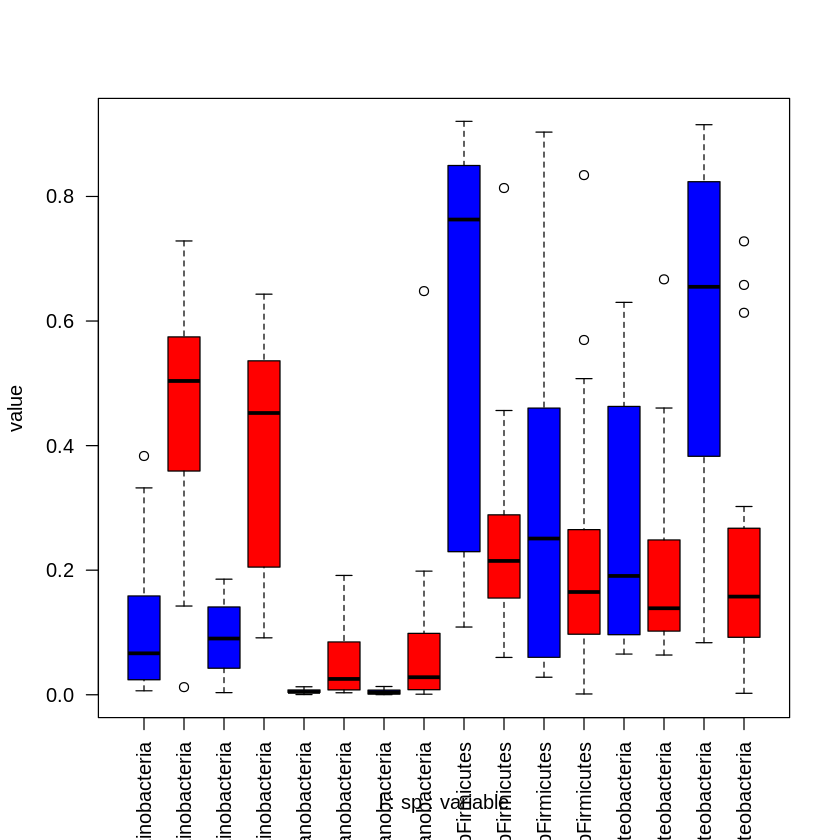

In [74]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
rownames(otu)<-paste(otu$Phylum,row.names(otu),sep="_")
otu<-aggregate(otu[,1:(dim(otu)[2]-7)],by=list(otu$Phylum),FUN=sum)
rownames(otu)<-otu[,1]
otu<-otu[,-1]
otu<-otu[-1,]
otu<-decostand(t(otu),method="total")

map<-read.table("F649_R889_map_r_MS.csv",row.names=1,sep=",",header=T)
map2<-map[map$Canopy=="South",]
x<-subset(otu[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
p<-cbind(p$tree_species,p$sample_type, p[,((dim(map2)[2])+1):dim(p)[2]])                               
#p<-p[,-c(1:14,16:21,23:32)]

pp<-p[,-1]
pp<-pp[,-1]

xx <- pp[,colSums(pp) > 0.7]
l<-p[,2]
sp<-p[,1]
x<-cbind(l,sp,xx)
x<-melt(x)
x<-x[order(-x$l),]
x<-x[order(x$sp),]
write.table(x,"x.txt",sep="\t",quote=FALSE)
x<-read.table("x.txt",header=T,row.names=1,sep="\t")

colfunc<-colorRampPalette(c("blue", "red"))

#pdf("Figure3.pdf")
boxplot(value~l*sp*variable,data=x,las=2,col=(c("blue","red")))
#dev.off()



In [77]:
unique(x$variable)

[1] pActinobacteria pCyanobacteria  pFirmicutes     pProteobacteria
Levels: pActinobacteria pCyanobacteria pFirmicutes pProteobacteria

In [78]:
a<-paste(x$l, x$sp,x$variable,sep="_")
xx<-cbind (a,x)
v<-log(xx$value)
xx<-cbind (xx,v)
head(xx)

,a,l,sp,variable,value,v
3,Endosphere_raddiana_pActinobacteria,Endosphere,raddiana,pActinobacteria,0.006362521,-5.0573306
4,Exosphere_raddiana_pActinobacteria,Exosphere,raddiana,pActinobacteria,0.012262573,-4.4012035
5,Endosphere_raddiana_pActinobacteria,Endosphere,raddiana,pActinobacteria,0.383367140,-0.9587622
6,Exosphere_raddiana_pActinobacteria,Exosphere,raddiana,pActinobacteria,0.347462777,-1.0570977
11,Endosphere_raddiana_pActinobacteria,Endosphere,raddiana,pActinobacteria,0.075836185,-2.5791797
12,Exosphere_raddiana_pActinobacteria,Exosphere,raddiana,pActinobacteria,0.574574000,-0.5541264


In [80]:
install.packages('agricolae')

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘R.cache’, ‘rematch2’, ‘rprojroot’, ‘e1071’, ‘haven’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’, ‘klaR’, ‘AlgDesign’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [81]:
library(agricolae)


Registered S3 methods overwritten by 'klaR':
  method      from 
  predict.rda vegan
  print.rda   vegan
  plot.rda    vegan


,a,l,sp,variable,value,v
3,Endosphere_raddiana_pActinobacteria,Endosphere,raddiana,pActinobacteria,0.006362521,-5.0573306
4,Exosphere_raddiana_pActinobacteria,Exosphere,raddiana,pActinobacteria,0.012262573,-4.4012035
5,Endosphere_raddiana_pActinobacteria,Endosphere,raddiana,pActinobacteria,0.383367140,-0.9587622
6,Exosphere_raddiana_pActinobacteria,Exosphere,raddiana,pActinobacteria,0.347462777,-1.0570977
11,Endosphere_raddiana_pActinobacteria,Endosphere,raddiana,pActinobacteria,0.075836185,-2.5791797
12,Exosphere_raddiana_pActinobacteria,Exosphere,raddiana,pActinobacteria,0.574574000,-0.5541264


$statistics
   MSerror  Df      Mean        CV
  1.225296 248 -2.385744 -46.39771

$parameters
   test name.t ntr StudentizedRange alpha
  Tukey      a  16         4.895658  0.05

$means
                                             v       std  r       Min
Endosphere_raddiana_pActinobacteria -2.8726991 1.3417785 12 -5.057331
Endosphere_raddiana_pCyanobacteria  -5.4595853 0.9983369 12 -8.185457
Endosphere_raddiana_pFirmicutes     -0.7524100 0.8132329 12 -2.218965
Endosphere_raddiana_pProteobacteria -1.5653980 0.8160024 12 -2.727911
Endosphere_tortilis_pActinobacteria -2.7867625 1.1209139 18 -5.678877
Endosphere_tortilis_pCyanobacteria  -5.9853434 1.3042806 18 -8.758491
Endosphere_tortilis_pFirmicutes     -1.7385252 1.1510350 18 -3.569058
Endosphere_tortilis_pProteobacteria -0.6699199 0.7098942 18 -2.481568
Exosphere_raddiana_pActinobacteria  -0.9970179 0.9457055 18 -4.401203
Exosphere_raddiana_pCyanobacteria   -3.7117301 1.2927616 18 -5.747571
Exosphere_raddiana_pFirmicutes      -1.5493

$statistics
     MSerror  Df      Mean       CV
  0.03404931 248 0.2430969 75.90576

$parameters
   test name.t ntr StudentizedRange alpha
  Tukey      a  16         4.895658  0.05

$means
                                          value         std  r          Min
Endosphere_raddiana_pActinobacteria 0.112338701 0.127778668 12 0.0063625210
Endosphere_raddiana_pCyanobacteria  0.005704721 0.003602926 12 0.0002786769
Endosphere_raddiana_pFirmicutes     0.594571139 0.323581450 12 0.1087216249
Endosphere_raddiana_pProteobacteria 0.279486962 0.212542218 12 0.0653556792
Endosphere_tortilis_pActinobacteria 0.089902597 0.058602907 18 0.0034173934
Endosphere_tortilis_pCyanobacteria  0.004427427 0.003811415 18 0.0001571215
Endosphere_tortilis_pFirmicutes     0.295987645 0.276486586 18 0.0281823939
Endosphere_tortilis_pProteobacteria 0.603425257 0.261883721 18 0.0836120401
Exosphere_raddiana_pActinobacteria  0.457911581 0.191539098 18 0.0122625734
Exosphere_raddiana_pCyanobacteria   0.048093491 0.0

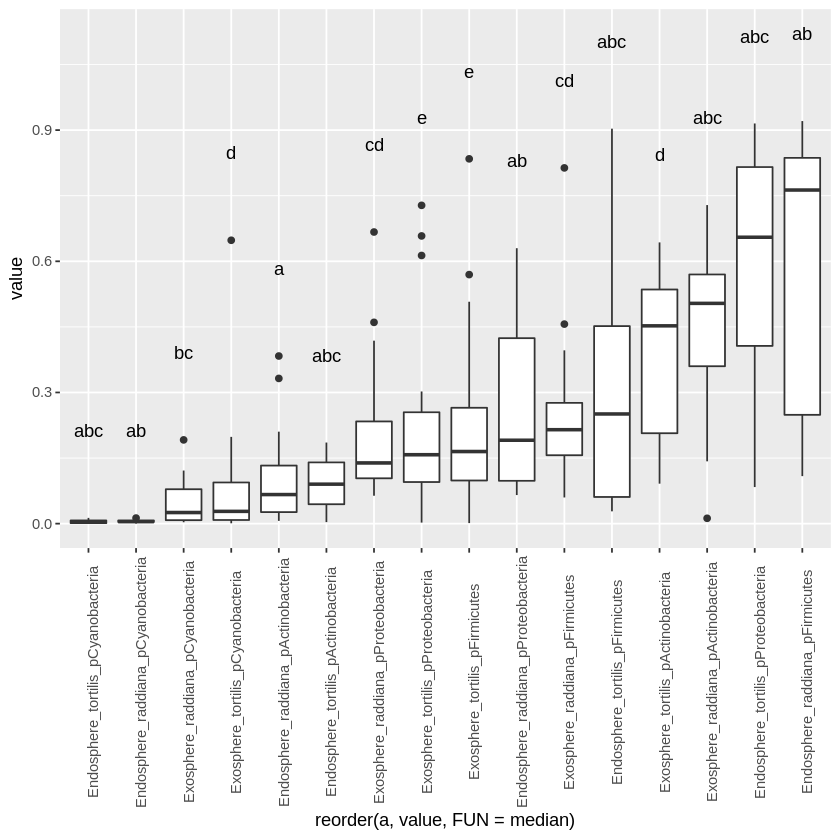

In [82]:
#xx<-xx[xx$variable=="pProteobacteria",]
head(xx)
x.summarized = xx %>% group_by(a) %>% summarize(Max.value=max(value))
hsd=HSD.test(aov(v~a,data=xx), "a", group=T)
hsd


hsd2=HSD.test(aov(value~a,data=xx), "a", group=T)
hsd2
 #pdf("tuky.pdf")
 ggplot(xx,aes(x=reorder(a,value,FUN = median),y=value)) +theme(axis.text.x = element_text(angle = 90))+ geom_boxplot() + geom_text(data=x.summarized,aes(x=a,y=0.2+Max.value,label=hsd$groups$groups))
# dev.off()

# end of Figure 3

In [85]:
#install.packages("agricolae")
library(dplyr)
library(agricolae)
library(ggplot2)

In [86]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
rownames(otu)<-paste(otu$Family,row.names(otu),sep="_")
otu<-aggregate(otu[,1:(dim(otu)[2]-7)],by=list(otu$Phylum),FUN=sum)

rownames(otu)<-otu[,1]
otu<-otu[,-1]
otu<-otu[-1,]

#otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu
t_otus <- as.data.frame(t(otus))
#t_otus<-decostand(t_otus,method="total")
map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
#map2<-map[map$INC=="core_all",]
#map2<-map[map$Endo_exo=="Exosphere",]
#map2<-map[map$INC=="core_all" & map$Endo_exo=="Exosphere" & map$Species=="tortilis" & map$Month=="1" & map$Tree=="23",]
#map2<-map[map$INC=="core_all" & map$Endo_exo=="Exosphere" & map$Species=="tortilis",]
#map2<-map[map$INC=="core_all" & map$Endo_exo=="Exosphere" & map$Species=="tortilis"& map$Face=="Center",]
#map2<-map[map$INC=="core_all" & map$Endo_exo=="Exosphere",]

map2<-map[map$INC=="core_all" & map$Species=="tortilis" & map$Endo_exo=="Exosphere",]

x<-subset(t_otus[rownames(map2),])


p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
#rownames(p)<-p$Description
rownames(p)<-paste(p$Month,p$Face, p$Description)
p_exoS<-p
write.table(p_exoS,"p.txt",sep="\t",quote=FALSE)
p_exoS<-read.table("p.txt",header=T,row.names=1,sep="\t")
p_exoS<-p_exoS[order(row.names(p_exoS)),]
#cbind(row.names(p_exoS),p_exoS$VPD)
pp_exo<-p_exoS[,((dim(map2)[2])+1):dim(p_exoS)[2]]
ppp_exo<-pp_exo[,!!colSums(pp_exo)]

ppp_exo1<-pp_exo[,!!colSums(pp_exo)>1000]


#ppp_exo<-decostand(ppp_exo,method="total")



write.table(ppp_exo,"p.txt",sep="\t",quote=FALSE)
ppp_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")
#####################################3

ontes<- rownames(ppp_exo)
ppp_exo<-as.matrix(ppp_exo)
max(ppp_exo)
min(ppp_exo)
median(ppp_exo)

#pal1 <- colorRampPalette(c("lightblue","yellow", "orange", "red", "brown"))(n = 499) 
pal1 <- colorRampPalette(c("lightblue", "brown"))(n = 499) 

pal2 <- colorRampPalette(c("white","lightblue" ,"blue", "darkblue"))(n = 399)  
pal3 <- colorRampPalette(c("white", "lightgreen", "green", "darkgreen"))(n = 399)
pal4 = colorRampPalette(brewer.pal(8, "PiYG"))(399) 
pal5 = colorRampPalette(brewer.pal(8, "Blues"))(399)  
pal6 = cm.colors(399) 
pal7 = terrain.colors(399)
 

col_breaks = c(seq(0, 0.20,length=100),
               seq(0.21,0.40,length=100),
               seq(0.41,0.60,length=100),
               seq(0.61,0.80,length=100),
               seq(0.81,1.00,length=100))

#heatmap.2(ppp_exo*100,
#           main = "Top 10 Phyla",
#           notecol="black",
#           density.info="none",  
#           trace="none",
#           margins =c(12,9),
#           col=pal1,
#           breaks=col_breaks,
#           dendrogram="row",
#           Colv="NULL",
#           Rowv="NULL")           


##############################
# maxab <- apply(ppp_exo, 2, max)
# n1 <- names(which(maxab < 0.05))
# data.prop.1 <- ppp_exo[, -which(names(ppp_exo) %in% n1)]

ppp_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")

dnd = list(Row=list(status="yes"), Col=list(status="yes"),dist=vegdist, clustfun=hclust,lwd=0.5)

plot(annHeatmap2(as.matrix(ppp_exo1), 
                 dendrogram=dnd, 
                 cluster=row.clus,
                 col = pal1, 
                 breaks = col_breaks,
                 legend=3,
                 labels=list(Col=list(nrow=10))))

plot(annHeatmap2(as.matrix(ppp_exo), 
                 dendrogram=dnd, 
                 cluster=row.clus,
                 col = pal1, 
                 breaks = col_breaks,
                 legend=3))



maxab <- apply(ppp_exo, 2, max)
n1 <- names(which(maxab < 0.05))
data.prop.1 <- ppp_exo[, -which(names(ppp_exo) %in% n1)]

#heatmap(as.matrix(data.prop.1))

#dnd = list(Row=list(status="yes"), Col=list(status="no"),clustfun=row.clust)

data.dist <- vegdist(ppp_exo, method = "bray")
row.clus <- hclust(data.dist, "complete")
data.dist.g <- vegdist(t(data.prop.1), method = "bray")
col.clus <- hclust(data.dist.g, "complete")
scaleyellowred <- colorRampPalette(c("lightyellow", "red"), space = "rgb")(100)
#pdf("exo_raddiana.pdf")
#heatmap(as.matrix(data.prop.1))
#plot(annHeatmap2(as.matrix(ppp_exo), dendrogram=dnd, col = pal1, breaks = col_breaks,legend=3,labels=list(Col=list(nrow=10))))

#plot(annHeatmap2(as.matrix(data.prop.1), dendrogram=dnd, col = pal1, breaks = col_breaks,legend=3,labels=list(Col=list(nrow=10))))

#plot(annHeatmap2(as.matrix(data.prop.1),col = colorRampPalette(c("lightyellow", "red"), space = "rgb")(64), breaks = 71,legend=3,labels=list(Col=list(nrow=18))))
#dev.off()

[1] 55249

[1] 0

[1] 0

ERROR: Error in modifyExistingList(deflist, arglist): object 'row.clus' not found


In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
rownames(otu)<-paste(otu$Family,row.names(otu),sep="_")
otu<-aggregate(otu[,1:(dim(otu)[2]-7)],by=list(otu$Phylum),FUN=sum)

rownames(otu)<-otu[,1]
otu<-otu[,-1]
otu<-otu[-1,]

#otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu
t_otus <- as.data.frame(t(otus))
#t_otus<-decostand(t_otus,method="total")
map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
#map2<-map[map$INC=="core_all",]
#map2<-map[map$Endo_exo=="Exosphere",]
#map2<-map[map$INC=="core_all" & map$Endo_exo=="Exosphere" & map$Species=="tortilis" & map$Month=="1" & map$Tree=="23",]
#map2<-map[map$INC=="core_all" & map$Endo_exo=="Exosphere" & map$Species=="tortilis",]
#map2<-map[map$INC=="core_all" & map$Endo_exo=="Exosphere" & map$Species=="tortilis"& map$Face=="Center",]
#map2<-map[map$INC=="core_all" & map$Endo_exo=="Exosphere",]

map2<-map[map$INC=="core_all" & map$Species=="tortilis" & map$Endo_exo=="Exosphere",]

x<-subset(t_otus[rownames(map2),])


p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
#rownames(p)<-p$Description
rownames(p)<-paste(p$Month,p$Face, p$Description)
p_exoS<-p
write.table(p_exoS,"p.txt",sep="\t",quote=FALSE)
p_exoS<-read.table("p.txt",header=T,row.names=1,sep="\t")
p_exoS<-p_exoS[order(row.names(p_exoS)),]
#cbind(row.names(p_exoS),p_exoS$VPD)
pp_exo<-p_exoS[,((dim(map2)[2])+1):dim(p_exoS)[2]]
ppp_exo<-pp_exo[,!!colSums(pp_exo)]

ppp_exo1<-pp_exo[,!!colSums(pp_exo)>1000]


#ppp_exo<-decostand(ppp_exo,method="total")



write.table(ppp_exo,"p.txt",sep="\t",quote=FALSE)
ppp_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")
#####################################3

ontes<- rownames(ppp_exo)
ppp_exo<-as.matrix(ppp_exo)
max(ppp_exo)
min(ppp_exo)
median(ppp_exo)

#pal1 <- colorRampPalette(c("lightblue","yellow", "orange", "red", "brown"))(n = 499) 
pal1 <- colorRampPalette(c("lightblue", "brown"))(n = 499) 

pal2 <- colorRampPalette(c("white","lightblue" ,"blue", "darkblue"))(n = 399)  
pal3 <- colorRampPalette(c("white", "lightgreen", "green", "darkgreen"))(n = 399)
pal4 = colorRampPalette(brewer.pal(8, "PiYG"))(399) 
pal5 = colorRampPalette(brewer.pal(8, "Blues"))(399)  
pal6 = cm.colors(399) 
pal7 = terrain.colors(399)
 

col_breaks = c(seq(0, 0.20,length=100),
               seq(0.21,0.40,length=100),
               seq(0.41,0.60,length=100),
               seq(0.61,0.80,length=100),
               seq(0.81,1.00,length=100))

#heatmap.2(ppp_exo*100,
#           main = "Top 10 Phyla",
#           notecol="black",
#           density.info="none",  
#           trace="none",
#           margins =c(12,9),
#           col=pal1,
#           breaks=col_breaks,
#           dendrogram="row",
#           Colv="NULL",
#           Rowv="NULL")           


##############################
# maxab <- apply(ppp_exo, 2, max)
# n1 <- names(which(maxab < 0.05))
# data.prop.1 <- ppp_exo[, -which(names(ppp_exo) %in% n1)]

ppp_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")

dnd = list(Row=list(status="yes"), Col=list(status="yes"),dist=vegdist, clustfun=hclust,lwd=0.5)

plot(annHeatmap2(as.matrix(ppp_exo1), 
                 dendrogram=dnd, 
                 cluster=row.clus,
                 col = pal1, 
                 breaks = col_breaks,
                 legend=3,
                 labels=list(Col=list(nrow=10))))

plot(annHeatmap2(as.matrix(ppp_exo), 
                 dendrogram=dnd, 
                 cluster=row.clus,
                 col = pal1, 
                 breaks = col_breaks,
                 legend=3))



maxab <- apply(ppp_exo, 2, max)
n1 <- names(which(maxab < 0.05))
data.prop.1 <- ppp_exo[, -which(names(ppp_exo) %in% n1)]

#heatmap(as.matrix(data.prop.1))

#dnd = list(Row=list(status="yes"), Col=list(status="no"),clustfun=row.clust)

data.dist <- vegdist(ppp_exo, method = "bray")
row.clus <- hclust(data.dist, "complete")
data.dist.g <- vegdist(t(data.prop.1), method = "bray")
col.clus <- hclust(data.dist.g, "complete")
scaleyellowred <- colorRampPalette(c("lightyellow", "red"), space = "rgb")(100)
#pdf("exo_raddiana.pdf")
#heatmap(as.matrix(data.prop.1))
#plot(annHeatmap2(as.matrix(ppp_exo), dendrogram=dnd, col = pal1, breaks = col_breaks,legend=3,labels=list(Col=list(nrow=10))))

#plot(annHeatmap2(as.matrix(data.prop.1), dendrogram=dnd, col = pal1, breaks = col_breaks,legend=3,labels=list(Col=list(nrow=10))))

#plot(annHeatmap2(as.matrix(data.prop.1),col = colorRampPalette(c("lightyellow", "red"), space = "rgb")(64), breaks = 71,legend=3,labels=list(Col=list(nrow=18))))
#dev.off()

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
t_otus<-decostand(t_otus,method="total")

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep="\t",header=T)
map2<-map[map$INC=="core_all",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")

p_exo<-p[p$Endo_exo=="Exosphere",]
write.table(p_exo,"p.txt",sep="\t",quote=FALSE)
p_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")

pp_exo<-p_exo[,((dim(map2)[2])+1):dim(p_exo)[2]]
ppp_exo<-pp_exo[,!!colSums(pp_exo)]


NMDS_bray<-metaMDS(ppp_exo,distance="bray",k=2,trymax=10000,autotransform=F)
zz<-scores(NMDS_bray,display="site")
# #l_canopy<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$Face)
# #l_species<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$Species)

# colfunc<-colorRampPalette(c("blue", "red","green"))
# #pdf("canopy.pdf")
# plot(NMDS_bray,dis="site",type="n")
# points(NMDS_bray,col=colfunc(3)[p_exo$Face],pch=as.numeric(p_exo$Species),cex=1.5,lwd=1.5)
# legend(x=1.55,y=1.76,legend=unique(p_exo$Face),fill=colfunc(3)[unique(p_exo$Face)])
# legend(x=1.37,y=1.1,legend=unique(p_exo$Species),pch=unique(as.numeric(p_exo$Species)))
# text(y=-1.5,x=1.8,label=paste("Stress=",round(NMDS_bray$stress,digits=4)))
# text(y=1.3,x=-0.9,label=paste("Canopy p-value=",l_canopy$signif))
# text(y=1.15,x=-0.9,label=paste("Species p-value=",l_species$signif))
# title("Exosphere different canopy bacterial communities",font.main=1,cex.main=1,adj=0)
# #dev.off()


In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
rownames(otu)<-paste(otu$Family,row.names(otu),sep="_")
otu<-aggregate(otu[,1:(dim(otu)[2]-7)],by=list(otu$Phylum),FUN=sum)

rownames(otu)<-otu[,1]
otu<-otu[,-1]
otu<-otu[-1,]

#otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu
t_otus <- as.data.frame(t(otus))
#t_otus<-decostand(t_otus,method="total")
map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
#map2<-map[map$INC=="core_all",]
#map2<-map[map$Endo_exo=="Exosphere",]
#map2<-map[map$INC=="core_all" & map$Endo_exo=="Exosphere" & map$Species=="tortilis" & map$Month=="1" & map$Tree=="23",]
#map2<-map[map$INC=="core_all" & map$Endo_exo=="Exosphere" & map$Species=="tortilis",]
#map2<-map[map$INC=="core_all" & map$Endo_exo=="Exosphere" & map$Species=="tortilis"& map$Face=="Center",]
#map2<-map[map$INC=="core_all" & map$Endo_exo=="Exosphere",]

map2<-map[map$INC=="core_all" & map$Species=="tortilis" & map$Endo_exo=="Exosphere",]

x<-subset(t_otus[rownames(map2),])


p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
#rownames(p)<-p$Description
rownames(p)<-paste(p$Month,p$Face, p$Description)
p_exoS<-p
write.table(p_exoS,"p.txt",sep="\t",quote=FALSE)
p_exoS<-read.table("p.txt",header=T,row.names=1,sep="\t")
p_exoS<-p_exoS[order(row.names(p_exoS)),]
#cbind(row.names(p_exoS),p_exoS$VPD)
pp_exo<-p_exoS[,((dim(map2)[2])+1):dim(p_exoS)[2]]
ppp_exo<-pp_exo[,!!colSums(pp_exo)]

ppp_exo1<-pp_exo[,!!colSums(pp_exo)>1000]


#ppp_exo<-decostand(ppp_exo,method="total")



write.table(ppp_exo,"p.txt",sep="\t",quote=FALSE)
ppp_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")
#####################################3

ontes<- rownames(ppp_exo)
ppp_exo<-as.matrix(ppp_exo)
max(ppp_exo)
min(ppp_exo)
median(ppp_exo)

#pal1 <- colorRampPalette(c("lightblue","yellow", "orange", "red", "brown"))(n = 499) 
pal1 <- colorRampPalette(c("lightblue", "brown"))(n = 499) 

pal2 <- colorRampPalette(c("white","lightblue" ,"blue", "darkblue"))(n = 399)  
pal3 <- colorRampPalette(c("white", "lightgreen", "green", "darkgreen"))(n = 399)
pal4 = colorRampPalette(brewer.pal(8, "PiYG"))(399) 
pal5 = colorRampPalette(brewer.pal(8, "Blues"))(399)  
pal6 = cm.colors(399) 
pal7 = terrain.colors(399)
 

col_breaks = c(seq(0, 0.20,length=100),
               seq(0.21,0.40,length=100),
               seq(0.41,0.60,length=100),
               seq(0.61,0.80,length=100),
               seq(0.81,1.00,length=100))

#heatmap.2(ppp_exo*100,
#           main = "Top 10 Phyla",
#           notecol="black",
#           density.info="none",  
#           trace="none",
#           margins =c(12,9),
#           col=pal1,
#           breaks=col_breaks,
#           dendrogram="row",
#           Colv="NULL",
#           Rowv="NULL")           


##############################
# maxab <- apply(ppp_exo, 2, max)
# n1 <- names(which(maxab < 0.05))
# data.prop.1 <- ppp_exo[, -which(names(ppp_exo) %in% n1)]

ppp_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")

dnd = list(Row=list(status="yes"), Col=list(status="yes"),dist=vegdist, clustfun=hclust,lwd=0.5)

plot(annHeatmap2(as.matrix(ppp_exo1), 
                 dendrogram=dnd, 
                 cluster=row.clus,
                 col = pal1, 
                 breaks = col_breaks,
                 legend=3,
                 labels=list(Col=list(nrow=10))))

plot(annHeatmap2(as.matrix(ppp_exo), 
                 dendrogram=dnd, 
                 cluster=row.clus,
                 col = pal1, 
                 breaks = col_breaks,
                 legend=3))



maxab <- apply(ppp_exo, 2, max)
n1 <- names(which(maxab < 0.05))
data.prop.1 <- ppp_exo[, -which(names(ppp_exo) %in% n1)]

#heatmap(as.matrix(data.prop.1))

#dnd = list(Row=list(status="yes"), Col=list(status="no"),clustfun=row.clust)

data.dist <- vegdist(ppp_exo, method = "bray")
row.clus <- hclust(data.dist, "complete")
data.dist.g <- vegdist(t(data.prop.1), method = "bray")
col.clus <- hclust(data.dist.g, "complete")
scaleyellowred <- colorRampPalette(c("lightyellow", "red"), space = "rgb")(100)
#pdf("exo_raddiana.pdf")
#heatmap(as.matrix(data.prop.1))
#plot(annHeatmap2(as.matrix(ppp_exo), dendrogram=dnd, col = pal1, breaks = col_breaks,legend=3,labels=list(Col=list(nrow=10))))

#plot(annHeatmap2(as.matrix(data.prop.1), dendrogram=dnd, col = pal1, breaks = col_breaks,legend=3,labels=list(Col=list(nrow=10))))

#plot(annHeatmap2(as.matrix(data.prop.1),col = colorRampPalette(c("lightyellow", "red"), space = "rgb")(64), breaks = 71,legend=3,labels=list(Col=list(nrow=18))))
#dev.off()

In [ ]:
#ppp_exo1<-read.table("p.txt",header=T,row.names=1,sep="\t")

ppp_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")
#####################################3
ppp_exo1<-as.matrix(ppp_exo1)

ppp_exo<-as.matrix(ppp_exo)
max(ppp_exo)
min(ppp_exo)
median(ppp_exo)

pal1 <- colorRampPalette(c("white","yellow", "orange", "red", "brown"))(n = 499) 
#pal1 <- colorRampPalette(c("lightyellow","blue", "brown"))(n = 499) 

pal2 <- colorRampPalette(c("gray","blue","green","red"))(n = 499)  
pal3 <- colorRampPalette(c("white", "lightgreen", "green", "darkgreen"))(n = 399)
pal4 = colorRampPalette(brewer.pal(8, "PiYG"))(399) 
pal5 = colorRampPalette(brewer.pal(8, "Blues"))(399)  
pal6 = cm.colors(399) 
pal7 = terrain.colors(399)
 

col_breaks = c(seq(0, 0.10,length=100),
               seq(0.10000000001,0.2,length=100),
               seq(0.20000000001,0.40,length=100),
               seq(0.40000000001,0.60,length=100),
               seq(0.60000000001,1.00,length=100))



 dnd = list(Row=list(status="yes"), Col=list(status="yes"),dist=vegdist, clustfun=hclust,lwd=0.5)

#pdf("heat1.pdf")

plot(annHeatmap2((ppp_exo), 
                  dendrogram=dnd, 
                  col = pal2, 
                  breaks = col_breaks,
                  legend=3,
                  labels=list(Col=list(nrow=10))))
#heatmap(ppp_exo,col=pal2,cexRow=0.5,cexCol=0.6)
#heatmap(ppp_exo1,col=pal2,cexRow=0.5,cexCol=0.6)
#dev.off()

In [ ]:
max(ppp_exo)
min(ppp_exo)
median(ppp_exo)

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
rownames(otu)<-paste(otu$Family,row.names(otu),sep="_")
#otu<-aggregate(otu[,1:(dim(otu)[2]-7)],by=list(otu$Family),FUN=sum)
#rownames(otu)<-otu[,1]
#otu<-otu[,-1]
#otu<-otu[-1,]
otu2<-otu[,1:(dim(otu)[2]-7)]
otumat=as.matrix(otu2)
taxmat=as.matrix(otu2<-otu[,(dim(otu)[2]-6):(dim(otu)[2])])
OTU = otu_table(otumat, taxa_are_rows = TRUE)
TAX = tax_table(taxmat)
physeq = phyloseq(OTU, TAX)

In [ ]:
# otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
# rownames(otu)<-paste(otu$Family,row.names(otu),sep="_")
# otu2<-otu[,1:(dim(otu)[2]-7)]
# otus<-otu2
# t_otus <- as.data.frame(t(otus))
# t_otus<-decostand(t_otus,method="total")
# map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)

# map1<-map[map$INC=="core_all" & map$Face=="South",]

# #map1<-map[map$INC=="core_all" & map$Endo_exo=="Exosphere" & map$Species=="tortilis" & map$Month=="1" & map$Tree=="23",]
# x1<-subset(t_otus[rownames(map1),])
# p<-cbind(map1,x1)

# write.table(p,"p.txt",sep="\t",quote=FALSE)
# p<-read.table("p.txt",header=T,row.names=1,sep="\t")
# rownames(p)<-p$Description
# p_exoS<-p
# write.table(p_exoS,"p.txt",sep="\t",quote=FALSE)
# p_exoS<-read.table("p.txt",header=T,row.names=1,sep="\t")
# p_exoS<-p_exoS[order(row.names(p_exoS)),]

# #cbind(row.names(p_exoS),p_exoS$VPD)
# pp_exo<-p_exoS[,((dim(map2)[2])+1):dim(p_exoS)[2]]
# ppp_exo<-pp_exo[,!!colSums(pp_exo)]
# ppp_exo<-decostand(ppp_exo,method="total")
# write.table(ppp_exo,"p.txt",sep="\t",quote=FALSE)
# ppp_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")
# maxab <- apply(ppp_exo, 2, max)
# n1 <- names(which(maxab < 0.05))
# data.prop.1 <- ppp_exo[, -which(names(ppp_exo) %in% n1)]
# data.dist <- vegdist(ppp_exo, method = "bray")
# row.clus <- hclust(data.dist, "complete")
# data.dist.g <- vegdist(t(data.prop.1), method = "bray")
# col.clus <- hclust(data.dist.g, "complete")
# scaleyellowred <- colorRampPalette(c("lightyellow", "red"), space = "rgb")(100)
# pdf("tortilis.pdf")
plot(annHeatmap2(as.matrix(data.prop.1),col = colorRampPalette(c("lightyellow", "red"), space = "rgb")(60), breaks = 71,legend=3))#,labels=list(Col=list(nrow=1))))
# dev.off()


In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",row.names=1,na.strings = "NA",fill=T)
write.table(otu,"x.txt",sep=",",quote=FALSE)
otu <- read.csv("x.txt", header=T, na.strings="")
#otu<-otu[ rowSums(otu[,1:(dim(otu)[2]-7)]) >= 10, ]
otu<-otu[,1:(dim(otu)[2]-5)]
otu$expected2<-apply(otu[,1:(dim(otu)[2])],1,function(x) last(na.omit(x)))
otu<-aggregate(otu[,1:(dim(otu)[2]-3)],by=list(otu$expected2),FUN=sum)
row.names(otu)<-otu[,1]
otu<-otu[,-1]
otu<-t(otu)
t_otus<-decostand(otu,method="total")                  
map<-read.table("F649_R889_map_r2_MS2.csv",row.names=1,sep=",",header=T)
map1<-map[map$INC=="core_all" & map$Endo_exo=="Endo"& map$Species=="T" & map$Tree=="300",]
                     
x1<-subset(t_otus[rownames(map1),])
p<-cbind(map1,x1)

write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
rownames(p)<-p$Description
p_exoS<-p
write.table(p_exoS,"p.txt",sep="\t",quote=FALSE)
p_exoS<-read.table("p.txt",header=T,row.names=1,sep="\t")
#p_exoS<-p_exoS[order(row.names(p_exoS)),]

#cbind(row.names(p_exoS),p_exoS$VPD)
pp_exo<-p_exoS[,((dim(map1)[2])+1):dim(p_exoS)[2]]
ppp_exo<-pp_exo[,!!colSums(pp_exo)]
ppp_exo<-decostand(ppp_exo,method="total")
write.table(ppp_exo,"p.txt",sep="\t",quote=FALSE)
ppp_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")
maxab <- apply(ppp_exo, 2, max)
n1 <- names(which(maxab < 0.05))
data.prop.1 <- ppp_exo[, -which(names(ppp_exo) %in% n1)]
data.dist <- vegdist(ppp_exo, method = "bray")
row.clus <- hclust(data.dist, "complete")
data.dist.g <- vegdist(t(data.prop.1), method = "bray")
col.clus <- hclust(data.dist.g, "complete")
scaleyellowred <- colorRampPalette(c("lightyellow", "red"), space = "rgb")(100)
pdf("tortilis2.pdf")
#plot(annHeatmap2(as.matrix(data.prop.1),col = colorRampPalette(c("yellow", "red"), space = "rgb")(68), breaks = 68,legend=3),lwd=0.01,cex=0.5)#,labels=list(Col=list(nrow=1))))
#annHeatmap2(as.matrix(data.prop.1),ann=list(data.prop.1),col = colorRampPalette(c("yellow", "red"), space = "rgb")(68), breaks = 68,legend=3)
mat=as.matrix(t(data.prop.1))
    ann = data.frame(p_exoS$Month)
hmap1 = annHeatmap(mat, ann,col = colorRampPalette(c("lightyellow", "red"),space = "rgb")(57), breaks = 43,legend=3)

plot(hmap1)
dev.off()


In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",row.names=1,na.strings = "NA",fill=T)
write.table(otu,"x.txt",sep=",",quote=FALSE)
otu <- read.csv("x.txt", header=T, na.strings="")
otu<-otu[,1:(dim(otu)[2]-2)]
otu$expected2<-apply(otu[,1:(dim(otu)[2])],1,function(x) last(na.omit(x)))
otu<-aggregate(otu[,1:(dim(otu)[2]-6)],by=list(otu$expected2),FUN=sum)
row.names(otu)<-otu[,1]
otu<-otu[,-1]
otu<-t(otu)
t_otus<-decostand(otu,method="total")                  
map<-read.table("F649_R889_map_r2_MS2.csv",row.names=1,sep=",",header=T)
map1<-map[map$INC=="core_all" & map$Endo_exo=="Epi",]
#map1<-map[map$INC=="core_all" & map$Face=="South",]
#map1<-map[map$INC=="core_all" & map$Endo_exo=="Exosphere" & map$Species=="tortilis" & map$Month=="1" & map$Tree=="23",]

                     
x1<-subset(t_otus[rownames(map1),])
p<-cbind(map1,x1)

write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
rownames(p)<-p$Description
p_exoS<-p
write.table(p_exoS,"p.txt",sep="\t",quote=FALSE)
p_exoS<-read.table("p.txt",header=T,row.names=1,sep="\t")
p_exoS<-p_exoS[order(row.names(p_exoS)),]

#cbind(row.names(p_exoS),p_exoS$VPD)
pp_exo<-p_exoS[,((dim(map1)[2])+1):dim(p_exoS)[2]]
ppp_exo<-pp_exo[,!!colSums(pp_exo)]
ppp_exo<-decostand(ppp_exo,method="total")
write.table(ppp_exo,"p.txt",sep="\t",quote=FALSE)
ppp_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")
maxab <- apply(ppp_exo, 2, max)
n1 <- names(which(maxab < 0.05))
data.prop.1 <- ppp_exo[, -which(names(ppp_exo) %in% n1)]
data.dist <- vegdist(ppp_exo, method = "bray")
row.clus <- hclust(data.dist, "complete")
data.dist.g <- vegdist(t(data.prop.1), method = "bray")
col.clus <- hclust(data.dist.g, "complete")
scaleyellowred <- colorRampPalette(c("lightyellow", "red"), space = "rgb")(100)
pdf("tortilis2.pdf")
#plot(annHeatmap2(as.matrix(data.prop.1),col = colorRampPalette(c("yellow", "red"), space = "rgb")(68), breaks = 68,legend=3),lwd=0.01,cex=0.5)#,labels=list(Col=list(nrow=1))))
#annHeatmap2(as.matrix(data.prop.1),ann=list(data.prop.1),col = colorRampPalette(c("yellow", "red"), space = "rgb")(68), breaks = 68,legend=3)
mat=as.matrix(t(data.prop.1))
    ann = data.frame(map1$Month)
hmap1 = annHeatmap(mat, ann,col = colorRampPalette(c("lightyellow", "red"),space = "rgb")(68), breaks = 68,legend=3)

plot(hmap1)
dev.off()


In [ ]:
map$Endo_exo

In [ ]:

map1[map1=="Exosphere"]<-"Epi"

In [ ]:
hairdid

In [ ]:
install.packages("dendextend")


In [ ]:

library(dendextend)

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("ComplexHeatmap")

In [ ]:
library(ComplexHeatmap)

In [ ]:
row_dend = hclust(dist(data.prop.1)) # row clustering
col_dend = hclust(dist(t(data.prop.1))) # column clustering
df<-as.matrix(data.prop.1)
Heatmap(df)#, name = "mtcars", 
#         row_names_gp = gpar(fontsize = 6.5),
#         cluster_rows = color_branches(row_dend, k = 4),
#         cluster_columns = color_branches(col_dend, k = 2))


In [ ]:
library("car")

### Exosphere different canopy bacterial communities Figure 5

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)

rownames(otu)<-paste(row.names(otu),otu$Family)

otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
#t_otus<-decostand(t_otus,method="total")

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)

map2<-map[map$INC=="core_all",]
#map2<-map[map$INC=="core_all" & map$Face=="South",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
rownames(p)<-p$Description
p_exoS<-p[p$Endo_exo=="Exosphere",]
#p_exoS<-p
write.table(p_exoS,"p.txt",sep="\t",quote=FALSE)
p_exoS<-read.table("p.txt",header=T,row.names=1,sep="\t")
p_exoS<-p_exoS[order(row.names(p_exoS)),]

#cbind(row.names(p_exoS),p_exoS$VPD)

p_exo<-p_exoS
pp_exo<-p_exoS[,((dim(map2)[2])+1):dim(p_exoS)[2]]
ppp_exo<-pp_exo[,!!colSums(pp_exo)]
ppp_exo<-decostand(ppp_exo,method="total")


write.table(ppp_exo,"p.txt",sep="\t",quote=FALSE)
ppp_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")


NMDS_bray<-metaMDS(ppp_exo,distance="bray",k=3,trymax=10000,autotransform=F)
zz<-scores(NMDS_bray,display="site")
l_canopy<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$Face)
l_species<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$Species,strata=p_exo$Face)

colfunc<-colorRampPalette(c("blue", "red","green"))
#pdf("canopy.pdf")
plot(NMDS_bray,dis="site",type="n")
points(NMDS_bray,col=colfunc(3)[p_exo$Face],pch=as.numeric(p_exo$Species),cex=1.5,lwd=1.5)
legend(x=1.55,y=1.76,legend=unique(p_exo$Face),fill=colfunc(3)[unique(p_exo$Face)])
legend(x=1.37,y=1.1,legend=unique(p_exo$Species),pch=unique(as.numeric(p_exo$Species)))
text(y=-1.5,x=1.8,label=paste("Stress=",round(NMDS_bray$stress,digits=4)))
text(y=1.3,x=-0.9,label=paste("Canopy p-value=",l_canopy$signif))
text(y=1.15,x=-0.9,label=paste("Species p-value=",l_species$signif))
title("Exosphere different canopy bacterial communities",font.main=1,cex.main=1,adj=0)
#dev.off()





In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
map<-read.table("F649_R889_map_r2_MS2.csv",row.names=1,sep=",",header=T)

map2<-map[map$INC=="core_all" &map$Endo_exo=="Epi",]



In [ ]:
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
rownames(p)<-p$Description
p_exoS<-p[p$Endo_exo=="Exosphere",]
#p_exoS<-p
write.table(p_exoS,"p.txt",sep="\t",quote=FALSE)
p_exoS<-read.table("p.txt",header=T,row.names=1,sep="\t")
p_exoS<-p_exoS[order(row.names(p_exoS)),]

#cbind(row.names(p_exoS),p_exoS$VPD)

p_exo<-p_exoS
pp_exo<-p_exoS[,((dim(map2)[2])+1):dim(p_exoS)[2]]
ppp_exo<-pp_exo[,!!colSums(pp_exo)]
ppp_exo<-decostand(ppp_exo,method="total")


write.table(ppp_exo,"p.txt",sep="\t",quote=FALSE)
ppp_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")


NMDS_bray<-metaMDS(ppp_exo,distance="bray",k=3,trymax=10000,autotransform=F)
zz<-scores(NMDS_bray,display="site")
l_canopy<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$Face)
l_species<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$Species,strata=p_exo$Face)


In [ ]:

p_exo<-p_exoS
p_exo$Face
p_exo$Face <- recode(p_exo$Face,"South" = 1, "Center" = 2, "North" = 3)
p_exo$Face

#scatter3D(zz[,1],zz[,2],as.numeric(p_exo$Face),clab=c("canopy"),xlab="NMDS1",ylab="NMDS2",zlab="canopy",pch=as.numeric(p_exo$Species))

scatter3D(zz[,1],zz[,2],p_exo$Face,clab=c("canopy"),xlab="NMDS1",ylab="NMDS2",zlab="canopy",pch=as.numeric(p_exo$Species))
text(y=-0.46,x=-0.35,label=paste("Canopy p-value=",l_canopy$signif))
text(y=-0.49,x=-0.36,label=paste("Species p-value=",l_species$signif))



### Epiphytes Month Figure4A

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)

rownames(otu)<-paste(row.names(otu),otu$Family)

otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
#t_otus<-decostand(t_otus,method="total")

map<-read.table("F649_R889_map_r2_MS2.csv",row.names=1,sep=",",header=T)

map2<-map[map$INC=="core_all",]
#map2<-map[map$INC=="core_all" & map$Face=="South",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
rownames(p)<-p$Description
p_exoS<-p[p$Endo_exo=="Exosphere",]
#p_exoS<-p
write.table(p_exoS,"p.txt",sep="\t",quote=FALSE)
p_exoS<-read.table("p.txt",header=T,row.names=1,sep="\t")
p_exoS<-p_exoS[order(row.names(p_exoS)),]

#cbind(row.names(p_exoS),p_exoS$VPD)

p_exo<-p_exoS
pp_exo<-p_exoS[,((dim(map2)[2])+1):dim(p_exoS)[2]]
ppp_exo<-pp_exo[,!!colSums(pp_exo)]
ppp_exo<-decostand(ppp_exo,method="total")


ppp_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")

p_exo$Face
NMDS_bray<-metaMDS(ppp_exo,distance="bray",k=3,trymax=10000,autotransform=F)
zz<-scores(NMDS_bray,display="site")

l_hum<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$hum)
#l_maxhum<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$maxhum)
l_temp<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$temp)
#l_maxtemp<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$max_temp)
l_month<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$Month)
l_hum
l_season<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$season,strata=p_exo$Species, permutation=999, distance="bray")
l_season

l_canopy<- anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$Face,strata=p_exo$Species, permutation=999, distance="bray")
l_canopy
#pdf("canopy_month.pdf")
#scatter3D(zz[,1],zz[,2],p_exo$Month,clab=c("Month"),xlab="NMDS1",ylab="NMDS2",zlab="Month",pch=as.numeric(p_exo$Face))
# legend("topleft",legend=unique(p_exo$Face),pch=unique(as.numeric(p_exo$Face)))
# text(y=-0.5,x=0.39,label=paste("Stress=",round(NMDS_bray$stress,digits=4)))

# text(y=-0.46,x=-0.35,label=paste("Canopy p-value=",l_canopy$signif))
# text(y=-0.49,x=-0.36,label=paste("Month p-value=",l_month$signif))
# text(y=-0.53,x=-0.29,label=paste("Air tempreature p-value=",l_temp$signif))

#dev.off()
# pdf("fig4A.pdf")
# colfunc<-colorRampPalette(c("blue", "green","yellow","red")
# scatter3D(zz[,1],zz[,2],p_exo$temp,clab=c("Temp"),xlab="NMDS1",ylab="NMDS2",zlab="Temp",pch=as.numeric(p_exo$Species),col=colfunc(48
# scatter2D(zz[,1],zz[,2],xlab="NMDS1",ylab="NMDS2",pch=as.numeric(p_exo$Canopy),col=colfunc(10))
# dev.off()
#pdf("fig4A.pdf")
colfunc<-colorRampPalette(c("blue", "green","yellow","red"))
scatter3D(zz[,1],zz[,2],p_exo$temp,clab=c("Temp"),xlab="NMDS1",ylab="NMDS2",zlab="Temp",pch=as.numeric(p_exo$Face),col=colfunc(48))
scatter2D(zz[,1],zz[,2],xlab="NMDS1",ylab="NMDS2",pch=as.numeric(p_exo$Face),col=colfunc(10))
#dev.off()

In [ ]:
pdf("hc.pdf")
vg<-dist(ppp_exo,method="euclidean")
h<-hclust(vg, method = "complete")
plot(h,cex = 0.3)
dev.off()

In [ ]:
library(cluster)
library(optpart)

In [ ]:
#scatter2D(zz[,1],zz[,2],xlab="NMDS1",ylab="NMDS2",pch=as.numeric(p_exo$Face),col=colfunc(10))
plot(m1, dis = "sites", type = "p")
ordiellipse(m1, p_exo$Month,col = "blue", kind="se",conf=0.95)

In [ ]:
env<-cbind(p_exo$Month,p_exo$temp,p_exo$hum)
head(ppp_exo)


In [ ]:
data(mite)
data(mite.env)
data(mite.xy)
data(mite.pcnm)
head(mite.env)

In [ ]:
z <- betadiver(ppp_exo, "z")

m <- with(p_exoS, anosim(z, Face))
m
plot(m)



In [ ]:
with(p_exo, mrpp(z, Month, weight = 3))

In [ ]:
m <- with(p_exo, meandist(z, Month))
summary(m)
plot(m)

In [ ]:
z


In [ ]:
z <- betadiver(ppp_exo, "z")


In [ ]:
adonis(ppp_exo ~ Month, data = p_exo)

In [ ]:
plot(procrustes(m1, m2))
plot(m1,type="t")
plot(m2)

In [ ]:
plot(demopam)


In [ ]:
colfunc<-colorRampPalette(c("blue", "green","yellow","red"))
scatter3D(zz[,1],zz[,2],p_exo$Month,clab=c("Temp"),xlab="NMDS1",ylab="NMDS2",zlab="Temp",pch=as.numeric(p_exo$Month),col=colfunc(48))
#scatter3D(zz[,1],zz[,2],p_exo$Month,clab=c("Month"),xlab="NMDS1",ylab="NMDS2",zlab="Temp",pch=as.numeric(p_exo$Face),col=colfunc(48))
plot(p_exo$temp~p_exo$season)
length(p_exo$Month)
length(p_exo$temp)
scatter2D(zz[,1],zz[,2],xlab="NMDS1",ylab="NMDS2",pch=as.numeric(p_exo$Month),col=colfunc(10))


In [ ]:
pdf("fig4B.pdf")
colfunc<-colorRampPalette(c("blue", "green","yellow","red"))
scatter3D(zz[,1],zz[,2],p_exo$temp,clab=c("Temp"),xlab="NMDS1",ylab="NMDS2",zlab="Temp",pch=as.numeric(p_exo$Species),col=colfunc(48))
scatter2D(zz[,1],zz[,2],xlab="NMDS1",ylab="NMDS2",pch=as.numeric(p_exo$Species),col=colfunc(10))
dev.off()

In [ ]:
#pdf("fig4.pdf")
colfunc<-colorRampPalette(c("blue", "green","yellow","red")
scatter3D(zz[,1],zz[,2],p_exo$temp,clab=c("Temp"),xlab="NMDS1",ylab="NMDS2",zlab="Temp",pch=as.numeric(p_exo$Species),col=colfunc(48
                                                                                                                                ))
scatter2D(zz[,1],zz[,2],xlab="NMDS1",ylab="NMDS2",pch=as.numeric(p_exo$Species),col=colfunc(10))
#dev.off()

In [ ]:
p_exo$Month

In [ ]:
#pdf("Fig4A.pdf")
clab=c("Month")
scatter3D(zz[,1],zz[,2],p_exo$Month,clab=c("Month"),xlab="NMDS1",ylab="NMDS2",zlab="Month",pch=as.numeric(p_exo$Face))
# legend("topleft",legend=unique(p_exo$Face),pch=unique(as.numeric(p_exo$Face)))
# text(y=-0.45,x=-0.32,label=paste("Canopy p-value=",l_canopy$signif))
# #text(y=-0.49,x=-0.32,label=paste("Species p-value=",l_species$signif))
# text(y=-0.53,x=-0.31,label=paste("temp p-value=",l_temp$signif))
scatter2D(zz[,1],zz[,2],xlab="NMDS1",ylab="NMDS2",pch=as.numeric(p_exo$Face))
text(y=-0.45,x=-0.32,label=paste("Canopy p-value=",l_canopy$signif))
#text(y=-0.49,x=-0.32,label=paste("Species p-value=",l_species$signif))
text(y=-0.53,x=-0.31,label=paste("temp p-value=",l_temp$signif))
text(y=-0.53,x=-0.31,label=paste("stress=",NMDS_bray$stress))
text(y=-0.49,x=-0.36,label=paste("Month p-value=",l_month$signif))

#dev.off()



In [ ]:

#pdf("canopy_max_tem.pdf")
scatter3D(zz[,1],zz[,2],p_exo$temp,clab=c("max_temp","celsius"),xlab="NMDS1",ylab="NMDS2",zlab="min_temp",pch=as.numeric(p_exo$Species))
legend("topleft",legend=unique(p_exo$Face),pch=unique(as.numeric(p_exo$Face)))
text(y=-0.45,x=-0.32,label=paste("Canopy p-value=",l_canopy$signif))
text(y=-0.49,x=-0.32,label=paste("Species p-value=",l_species$signif))
text(y=-0.53,x=-0.31,label=paste("max_temp p-value=",l_temp$signif))
#dev.off()


scatter2D(zz[,1],zz[,2],clab=c("max_temp","celsius"),xlab="NMDS1",ylab="NMDS2",zlab="min_temp",pch=as.numeric(p_exo$Species))

#scatter2D(zz[,1],zz[,2],xlab="NMDS1",ylab="NMDS2",pch=as.numeric(p_exo$Species))



### South canopy Month Figure4B

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)

#rownames(otu)<-paste(row.names(otu),otu$Family)

otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))

map<-read.table("F649_R889_map_r_MS.csv",row.names=1,sep=",",header=T)

map2<-map[map$INC=="core_all",]
#map2<-map[map$INC=="core_all" & map$Face=="South",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
rownames(p)<-p$Description
p_exoS<-p[p$Canopy=="South",]
#p_exoS<-p
write.table(p_exoS,"p.txt",sep="\t",quote=FALSE)
p_exoS<-read.table("p.txt",header=T,row.names=1,sep="\t")
p_exoS<-p_exoS[order(row.names(p_exoS)),]

#cbind(row.names(p_exoS),p_exoS$VPD)

p_exo<-p_exoS
pp_exo<-p_exoS[,((dim(map2)[2])+1):dim(p_exoS)[2]]
ppp_exo<-pp_exo[,!!colSums(pp_exo)]
ppp_exo<-decostand(ppp_exo,method="total")


write.table(ppp_exo,"p.txt",sep="\t",quote=FALSE)
ppp_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")


NMDS_bray<-metaMDS(ppp_exo,distance="bray",k=3,trymax=10000,autotransform=F)
zz<-scores(NMDS_bray,display="site")

#scatter3D(zz[,1],zz[,2],p_exo$Month,clab=c("Month"),xlab="NMDS1",ylab="NMDS2",zlab="Month",pch=as.numeric(p_exo$Face))
#scatter2D(zz[,1],zz[,2],clab=c("Month"),xlab="NMDS1",ylab="NMDS2",pch=as.numeric(p_exo$Face))
#pdf("fig4B.pdf")
scatter2D(zz[,1],zz[,2],clab=c("month"),xlab="NMDS1",ylab="NMDS2",pch=as.numeric(p_exo$sample_type), col=p_exo$month)
legend("topleft",legend=unique(p_exo$sample_type),pch=unique(as.numeric(p_exo$sample_type)))
text(y=-0.53,x=-0.31,label=paste("stress=",NMDS_bray$stress))

#dev.off()


In [ ]:
l_season<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$season)
l_shedding<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$shedding)

l_temp<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$Temperature)
l_month<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$Month)
l_temp
l_month
l_season
l_shedding

In [ ]:
# l_hum<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$hum)

# l_maxhum<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$maxhum)
l_temp<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$temp)
l_maxtemp<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$max_temp)

l_month<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$Month)
l_season<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$season,strata=p_exo$Species, permutation=999, distance="bray")
#l_season

l_canopy<- anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$Face,strata=p_exo$Species, permutation=999, distance="bray")
#l_canopy
#pdf("canopy_month.pdf")
# scatter3D(zz[,1],zz[,2],p_exo$Month,clab=c("Month"),xlab="NMDS1",ylab="NMDS2",zlab="Month",pch=as.numeric(p_exo$Face))
# legend("topleft",legend=unique(p_exo$Face),pch=unique(as.numeric(p_exo$Face)))
# text(y=-0.5,x=0.39,label=paste("Stress=",round(NMDS_bray$stress,digits=4)))

# text(y=-0.46,x=-0.35,label=paste("Canopy p-value=",l_canopy$signif))
# text(y=-0.49,x=-0.36,label=paste("Month p-value=",l_month$signif))
# text(y=-0.53,x=-0.29,label=paste("Air tempreature p-value=",l_temp$signif))

#dev.off()

In [ ]:
p_exoS

In [ ]:
#pdf("Fig4A.pdf")
# scatter3D(zz[,1],zz[,2],p_exo$temp,clab=c("temp","celsius"),xlab="NMDS1",ylab="NMDS2",zlab="min_temp",pch=as.numeric(p_exo$Face))
# legend("topleft",legend=unique(p_exo$Face),pch=unique(as.numeric(p_exo$Face)))
# text(y=-0.45,x=-0.32,label=paste("Canopy p-value=",l_canopy$signif))
# #text(y=-0.49,x=-0.32,label=paste("Species p-value=",l_species$signif))
# text(y=-0.53,x=-0.31,label=paste("temp p-value=",l_temp$signif))
scatter2D(zz[,1],zz[,2],xlab="NMDS1",ylab="NMDS2",pch=as.numeric(p_exo$tree_species))
#text(y=-0.45,x=-0.32,label=paste("Canopy p-value=",l_canopy$signif))
#text(y=-0.49,x=-0.32,label=paste("Species p-value=",l_species$signif))
#text(y=-0.53,x=-0.31,label=paste("temp p-value=",l_temp$signif))
#text(y=-0.53,x=-0.31,label=paste("stress=",NMDS_bray$stress))
#text(y=-0.49,x=-0.36,label=paste("Month p-value=",l_month$signif))

#dev.off()

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)

rownames(otu)<-paste(row.names(otu),otu$Family)

otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
#t_otus<-decostand(t_otus,method="total")

map<-read.table("F649_R889_map_r2_MS2.csv",row.names=1,sep=",",header=T)

#map2<-map[map$INC=="core_all",]
map2<-map[map$INC=="core_all" & map$Canopy=="S",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
rownames(p)<-p$Description
#p_endoS<-p[p$Endo_exo=="Endosphere",]

p_endoS<-p
write.table(p_endoS,"p.txt",sep="\t",quote=FALSE)
p_endoS<-read.table("p.txt",header=T,row.names=1,sep="\t")
p_endS<-p_endoS[order(row.names(p_endoS)),]

#cbind(row.names(p_exoS),p_exoS$VPD)

p_endo<-p_endoS
pp_endo<-p_endoS[,((dim(map2)[2])+1):dim(p_endoS)[2]]
ppp_endo<-pp_endo[,!!colSums(pp_endo)]
ppp_endo<-decostand(ppp_endo,method="total")


write.table(ppp_endo,"p.txt",sep="\t",quote=FALSE)
ppp_endo<-read.table("p.txt",header=T,row.names=1,sep="\t")


NMDS_bray<-metaMDS(ppp_endo,distance="bray",k=3,trymax=10000,autotransform=F)
zz<-scores(NMDS_bray,display="site")
#l_canopy<-anosim((as.matrix((vegdist(ppp_endo,distance="bray")))),grouping=p_endo$Face)
#l_species<-anosim((as.matrix((vegdist(ppp_endo,distance="bray")))),grouping=p_endo$Species)


#l_hum<-anosim((as.matrix((vegdist(ppp_endo,distance="bray")))),grouping=p_endo$hum,strata=p_endo$Species, permutation=999, distance="bray")
#l_maxhum<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$maxhum)
#l_temp<-anosim((as.matrix((vegdist(ppp_endo,distance="bray")))),grouping=p_endo$temp,strata=p_endo$Species, permutation=999, distance="bray")
#l_maxtemp<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$max_temp)
# l_month<-anosim((as.matrix((vegdist(ppp_endo,distance="bray")))),grouping=p_endo$Month, strata=p_endo$Species, permutation=999, distance="bray")
# l_season<-anosim((as.matrix((vegdist(ppp_endo,distance="bray")))),grouping=p_endo$season,strata=p_endo$Species, permutation=999, distance="bray")
# l_season


#pdf("Figure 4B_canopy_month.pdf")
scatter3D(zz[,1],zz[,2],p_endo$Month,clab=c("Month"),xlab="NMDS1",ylab="NMDS2",zlab="Month",pch=as.numeric(p_endo$tree_species))
 #legend("topleft",legend=unique(p_endo$Species),pch=unique(as.numeric(p_endo$Species)))
 #text(y=-0.42,x=-0.35,label=paste("Species p-value=",l_species$signif))
# text(y=-0.46,x=-0.36,label=paste("Month p-value=",l_month$signif))
 #text(y=-0.50,x=-0.29,label=paste("Air tempreature p-value=",l_temp$signif))
 #text(y=-0.50,x=-0.34,label=paste("Seasons p-value=",l_season$signif))


#dev.off()


In [ ]:
#pdf("Fig4B.pdf")

scatter2D(zz[,1],zz[,2],clab=c("temp"),xlab="NMDS1",ylab="NMDS2",zlab="temp",pch=as.numeric(p_endo$Species))
text(y=-0.45,x=-0.32,label=paste("Canopy p-value=",l_canopy$signif))
#text(y=-0.49,x=-0.32,label=paste("Species p-value=",l_species$signif))
text(y=-0.53,x=-0.31,label=paste("temp p-value=",l_temp$signif))
text(y=-0.53,x=-0.31,label=paste("stress=",NMDS_bray$stress))
text(y=-0.49,x=-0.36,label=paste("Month p-value=",l_month$signif))
#dev.off()

In [ ]:
pdf("x.pdf")
plot(NMDS_bray,dis="site",type="text")
dev.off()

In [ ]:
l_species$signif

In [ ]:
# l_season<-anosim((as.matrix((vegdist(ppp_endo,distance="bray")))),grouping=p_endo$season)

#adonis2(ppp_endo ~ p_endo$season*season, data = p_endo)
# adonis((as.matrix((vegdist(ppp_endo,distance="bray")))) ~ p_endo$season, data = p_endo,method="bray")

p_endo$season


# bird.dist<-vegdist(ppp_endo, method='bray')

# bird.div<-adonis2(bird.dist~season, data=p_endo, permutations = 999, method="bray")
# bird.div

 x<-(as.matrix((vegdist(ppp_endo,distance="bray", binary=T,upper=F,na.rm=T))))
#summary(x)
adonis2(x~p_endo$season*p_endo$Species,permutations=999,method="bray",
        sqrt.dsit=T, by="terms")

rownames(x)
rownames(p_endo)
# fit<-envfit(x~season*season,p_endo,strata= p_endo$Species)
# fit

In [ ]:
pairwise.adonis <- function(x,factors, sim.method = 'bray', p.adjust.m
='bonferroni')
{
library(vegan)
co = combn(unique(factors),2)
pairs = c()
F.Model =c()
R2 = c()
p.value = c()

for(elem in 1:ncol(co)){
ad = adonis(x[factors %in% c(co[1,elem],co[2,elem]),] ~ factors[factors
%in% c(co[1,elem],co[2,elem])] , method =sim.method);
pairs = c(pairs,paste(co[1,elem],'vs',co[2,elem]));
F.Model =c(F.Model,ad$aov.tab[1,4]);
R2 = c(R2,ad$aov.tab[1,5]);
p.value = c(p.value,ad$aov.tab[1,6])
}
p.adjusted = p.adjust(p.value,method=p.adjust.m)
pairw.res = data.frame(pairs,F.Model,R2,p.value,p.adjusted)
return(pairw.res)
}

In [ ]:
p_endo$Month[p_endo$Month == 1] <- "JanMar"
p_endo$Month[p_endo$Month == 3] <- "JanMar"
p_endo$Month[p_endo$Month == 4] <- "AprJun"
p_endo$Month[p_endo$Month == 5] <- "AprJun"
p_endo$Month[p_endo$Month == 6] <- "AprJun"
p_endo$Month[p_endo$Month == 7] <- "JulSep"
p_endo$Month[p_endo$Month == 8] <- "JulSep"
p_endo$Month[p_endo$Month == 7] <- "JulSep"

In [ ]:
p_endo$Month

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)

rownames(otu)<-paste(row.names(otu),otu$Family)

otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
#t_otus<-decostand(t_otus,method="total")

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)

map2<-map[map$INC=="core_all",]
map2<-map[map$INC=="core_all" & map$Face=="South",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)

# map2
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
rownames(p)<-p$Description
p_endoS<-p[p$Endo_exo=="Endosphere",]

p$Endo_exo
# #p_endoS<-p
write.table(p_endoS,"p.txt",sep="\t",quote=FALSE)
p_endoS<-read.table("p.txt",header=T,row.names=1,sep="\t")



# p_endS<-p_endoS[order(row.names(p_endoS)),]

# #cbind(row.names(p_exoS),p_exoS$VPD)

# p_endo<-p_endoS
# pp_endo<-p_endoS[,((dim(map2)[2])+1):dim(p_endoS)[2]]
# ppp_endo<-pp_endo[,!!colSums(pp_endo)]
# ppp_endo<-decostand(ppp_endo,method="total")
# p_endoS
# ppp_endo

# write.table(ppp_endo,"p.txt",sep="\t",quote=FALSE)
# ppp_endo<-read.table("p.txt",header=T,row.names=1,sep="\t")


# NMDS_bray<-metaMDS(ppp_endo,distance="bray",k=3,trymax=10000,autotransform=F)
# zz<-scores(NMDS_bray,display="site")
# #l_canopy<-anosim((as.matrix((vegdist(ppp_endo,distance="bray")))),grouping=p_endo$Face)
# l_species<-anosim((as.matrix((vegdist(ppp_endo,distance="bray")))),grouping=p_endo$Species)


# l_hum<-anosim((as.matrix((vegdist(ppp_endo,distance="bray")))),grouping=p_endo$hum)
# #l_maxhum<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$maxhum)
# l_temp<-anosim((as.matrix((vegdist(ppp_endo,distance="bray")))),grouping=p_endo$temp)
# #l_maxtemp<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$max_temp)
# l_month<-anosim((as.matrix((vegdist(ppp_endo,distance="bray")))),grouping=p_endo$Month)
# l_season<-anosim((as.matrix((vegdist(ppp_endo,distance="bray")))),grouping=p_endo$season)
# l_season


# #pdf("Figure 4B_canopy_month.pdf")
# scatter3D(zz[,1],zz[,2],p_endo$Month,clab=c("Month"),xlab="NMDS1",ylab="NMDS2",zlab="Month",pch=as.numeric(p_endo$Species))
#  legend("topleft",legend=unique(p_endo$Species),pch=unique(as.numeric(p_endo$Species)))
#  text(y=-0.45,x=-0.35,label=paste("Species p-value=",l_species$signif))
#  text(y=-0.49,x=-0.36,label=paste("Month p-value=",l_month$signif))
#  text(y=-0.53,x=-0.29,label=paste("Air tempreature p-value=",l_temp$signif))

# dev.off()


In [ ]:
ppp_endo


# diversity index

## Table2

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map2<-map[map$INC=="core_all" & map$Face=="South",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
rownames(p)<-p$Description
p_endoS<-p[p$Endo_exo=="Endosphere",]
write.table(p_endoS,"p.txt",sep="\t",quote=FALSE)
p_endoS<-read.table("p.txt",header=T,row.names=1,sep="\t")
p_endS<-p_endoS[order(row.names(p_endoS)),]
p_endo<-p_endoS
pp_endo<-p_endoS[,((dim(map2)[2])+1):dim(p_endoS)[2]]
ppp_endo<-pp_endo[,!!colSums(pp_endo)]
write.table(ppp_endo,"p.txt",sep="\t",quote=FALSE)
ppp_endo<-read.table("p.txt",header=T,row.names=1,sep="\t")



ppp_endo_shannon<-as.data.frame(diversity(ppp_endo, index="shannon"))
write.table(ppp_endo_shannon,"ppp_endo_shannon.txt",sep="\t",quote=FALSE)
ppp_endo_chao1=estimateR(ppp_endo)[2,]
write.table(ppp_endo_chao1,"ppp_endo_chao1.txt",sep="\t",quote=FALSE)
ppp_endo_invsimpson<-diversity(ppp_endo, index="invsimpson")
write.table(ppp_endo_invsimpson,"ppp_endo_invsimpson.txt",sep="\t",quote=FALSE)
ppp_endo_observed_sp<-rowSums(ppp_endo != 0)
write.table(ppp_endo_observed_sp,"ppp_endo_observed_sp.txt",sep="\t",quote=FALSE)
ppp_endo_simpson<-diversity(ppp_endo, index="simpson")
write.table(ppp_endo_simpson,"ppp_endo_simpson.txt",sep="\t",quote=FALSE)


## Table3

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)

otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)

map2<-map[map$INC=="core_all",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
rownames(p)<-p$Description

p_exoS<-p[p$Endo_exo=="Exosphere",]
write.table(p_exoS,"p.txt",sep="\t",quote=FALSE)
p_exoS<-read.table("p.txt",header=T,row.names=1,sep="\t")
p_exoS<-p_exoS[order(row.names(p_exoS)),]

p_exo<-p_exoS
pp_exo<-p_exoS[,((dim(map2)[2])+1):dim(p_exoS)[2]]
ppp_exo<-pp_exo[,!!colSums(pp_exo)]

write.table(ppp_exo,"p.txt",sep="\t",quote=FALSE)
ppp_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")


ppp_exo_shannon<-as.data.frame(diversity(ppp_exo, index="shannon"))
write.table(ppp_exo_shannon,"ppp_exo_shannon.txt",sep="\t",quote=FALSE)
ppp_exo_chao1=estimateR(ppp_exo)[2,]
write.table(ppp_exo_chao1,"ppp_exo_chao1.txt",sep="\t",quote=FALSE)
ppp_exo_invsimpson<-diversity(ppp_exo, index="invsimpson")
write.table(ppp_exo_invsimpson,"ppp_exo_invsimpson.txt",sep="\t",quote=FALSE)
ppp_exo_observed_sp<-rowSums(ppp_exo != 0)
write.table(ppp_exo_observed_sp,"ppp_exo_observed_sp.txt",sep="\t",quote=FALSE)
ppp_exo_simpson<-diversity(ppp_exo, index="simpson")
write.table(ppp_exo_simpson,"ppp_exo_simpson.txt",sep="\t",quote=FALSE)


## Suplementary Figure 3

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)

otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))

map<-read.table("F649_R889_map_r2_MS2.csv",row.names=1,sep=",",header=T)
map2<-map[map$INC=="core_all",]

x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
rownames(p)<-p$Description
pp<-p[,((dim(map2)[2])+1):dim(p)[2]]

Observed<-rowSums(pp != 0)
Chao1=estimateR(pp)[2,]
Shannon<-diversity(pp, index="shannon")


map3<-cbind(Chao1,Observed,Shannon,map2)

# mapt<-map3[map3$Epi_Endo=="Endo" & map3$tree_species=="T" & map3$Canopy=="S",] #& map$Face=="S" ,]#& map$Tree=="23",]

# mapr<-map3[map3$Epi_Endo=="Endo" & map3$tree_species=="R" & map3$Canopy=="S",]# & map$Endo_exo=="Epi" ,]#& map$Face=="S" ,]#& map$Tree=="23",]

# ggplot(mapt, aes(x = Month, y = Observed)) + 
# geom_boxplot(data = mapt,  aes(group = Month))

# ggplot(mapr, aes(x = Month, y = Observed)) + 
# geom_boxplot(data = mapr,  aes(group = Month))
# ggplot(mapr, aes(x = Month, y = VPD)) + geom_line(color = "blue")

mapt<-map3[map3$tree_species=="T" & map3$Canopy=="S",] #& map$Face=="S" ,]#& map$Tree=="23",]
mapr<-map3[map3$tree_species=="R" & map3$Canopy=="S",] #& map$Face=="S" ,]#& map$Tree=="23",]

#pdf("supp_Fig_3.pdf")
ggplot(mapt, aes(x = Month, y = Shannon,colour=Epi_Endo)) + 
ggtitle("A.tortilis") +
theme(plot.title = element_text(color="black", size=14, face="bold.italic")) +
ylab("Shannon-Wiener") +
geom_boxplot(data = mapt,  aes(group = interaction(Month, Epi_Endo)))
              
ggplot(mapr, aes(x = Month, y =Shannon,colour=Epi_Endo)) + 
ggtitle("A.raddiana") +
theme(plot.title = element_text(color="black", size=14, face="bold.italic")) +
ylab("Shannon-Wiener") +
geom_boxplot(data = mapr,  aes(group = interaction(Month, Epi_Endo)))

# ggplot(mapr, aes(x = Month, y = Chao1,colour=Epi_Endo)) + 
# geom_boxplot(data = mapr,  aes(group = interaction(Month, Epi_Endo)))
# ggplot(mapr, aes(x = month, y = Observed,colour=type)) + 
# geom_boxplot(data = mapr,  aes(group = interaction(month, type)))
ggplot(mapr, aes(x = Month, y = VPD)) + geom_line(color = "blue")
#dev.off()

##table 4

In [ ]:

map4<-map3[map3$Canopy=="S",]
colnames(map4)

xx<-map4[,c(1:3,14,23,26,18)]

head(xx)


In [ ]:

average <- aggregate(.~tree_species+month+Epi_Endo, xx, function(x) c(mean = mean(x)))

write.table(average,"average.txt",sep="\t",quote=FALSE)
#average

#stdev<-aggregate(.~month+Epi_Endo, xx, function(x) c(sd = sd(x)))  
#stdev

In [ ]:
install.packages("qwraps2", repo = "http://cran.rstudio.com")

In [ ]:
pdf("supp_Fig_3_Choa1.pdf")
ggplot(mapt, aes(x = Month, y = Chao1,colour=Epi_Endo)) + 
ggtitle("A.tortilis") +
theme(plot.title = element_text(color="black", size=14, face="bold.italic")) +
ylab("Chao1 richness") +
geom_boxplot(data = mapt,  aes(group = interaction(Month, Epi_Endo)))
              
ggplot(mapr, aes(x = Month, y =Chao1,colour=Epi_Endo)) + 
ggtitle("A.raddiana") +
theme(plot.title = element_text(color="black", size=14, face="bold.italic")) +
ylab("Chao1 richness") +
geom_boxplot(data = mapr,  aes(group = interaction(Month, Epi_Endo)))

# ggplot(mapr, aes(x = Month, y = Chao1,colour=Epi_Endo)) + 
# geom_boxplot(data = mapr,  aes(group = interaction(Month, Epi_Endo)))
# ggplot(mapr, aes(x = month, y = Observed,colour=type)) + 
# geom_boxplot(data = mapr,  aes(group = interaction(month, type)))
ggplot(mapr, aes(x = Month, y = VPD)) + geom_line(color = "blue")
dev.off()

pdf("supp_Fig_3.pdf")
ggplot(mapt, aes(x = Month, y = Shannon,colour=Epi_Endo)) + 
ggtitle("A.tortilis") +
theme(plot.title = element_text(color="black", size=14, face="bold.italic")) +
ylab("Shannon-Wiener") +
geom_boxplot(data = mapt,  aes(group = interaction(Month, Epi_Endo)))
              
ggplot(mapr, aes(x = Month, y =Shannon,colour=Epi_Endo)) + 
ggtitle("A.raddiana") +
theme(plot.title = element_text(color="black", size=14, face="bold.italic")) +
ylab("Shannon-Wiener") +
geom_boxplot(data = mapr,  aes(group = interaction(Month, Epi_Endo)))

# ggplot(mapr, aes(x = Month, y = Chao1,colour=Epi_Endo)) + 
# geom_boxplot(data = mapr,  aes(group = interaction(Month, Epi_Endo)))
# ggplot(mapr, aes(x = month, y = Observed,colour=type)) + 
# geom_boxplot(data = mapr,  aes(group = interaction(month, type)))
ggplot(mapr, aes(x = Month, y = VPD)) + geom_line(color = "blue")
dev.off()

# phyloseq

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("phyloseq")

In [ ]:
install.packages("xlsx")

In [2]:
library("phyloseq")
library("ggplot2")      # graphics
library("readxl")       # necessary to import the data from Excel file
library("dplyr")        # filter and reformat data frames
library("tibble")
#library("xlsx")

In [3]:
x<-read.table("F649_R889_map_r_MS.csv",row.names=1,sep=",",header=T)
sampledata<-x[x$INC=="core_all",]
sampledata<-as.matrix(sampledata)
sampledata=sample_data(data.frame(sampledata,row.names=rownames(sampledata)))

In [4]:
otumat<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otumat<-otumat[,1:(dim(otumat)[2]-7)]
otumat<-t(otumat)
otumat<-subset(t(otumat[rownames(sampledata),]))

otumat<-(otumat)
otumat<-as.matrix(otumat)
OTU = otu_table(otumat, taxa_are_rows = TRUE)


In [5]:
taxmat<-read.table("core_all_R.txt",header=T,sep="\t",fill=NA,row.names=1)
taxmat<-taxmat[,(dim(taxmat)[2]-6):dim(taxmat)[2]]
taxmat<-subset(taxmat[rownames(otumat),])
taxmat<-as.matrix(taxmat)
TAX = tax_table(taxmat)

In [6]:
physeq = phyloseq(OTU, TAX,sampledata)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4873 taxa and 137 samples ]
sample_data() Sample Data:       [ 137 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 4873 taxa by 7 taxonomic ranks ]

In [7]:
ntaxa(physeq)
physeq <- subset_taxa(physeq, (Kingdome=="kBacteria"))
ntaxa(physeq)
physeq <- subset_taxa(physeq, (Order!="Chloroplast") | is.na(Order))
ntaxa(physeq)

[1] 4873

[1] 4873

[1] 4873

In [8]:
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4873 taxa and 137 samples ]
sample_data() Sample Data:       [ 137 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 4873 taxa by 7 taxonomic ranks ]

## Figure 2

In [9]:
summary(sample_data(physeq)$sample_type)
physeq_epi_endo <- subset_samples(physeq, Canopy=="South")
summary(sample_data(physeq_epi_endo)$sample_type)

Endophytes  Epiphytes 
        30        107

Endophytes  Epiphytes 
        30         36

In [10]:
physeq_epi_endo1 = subset_samples(physeq_epi_endo, sample_sums(physeq_epi_endo) > 1000, TRUE)
physeq_epi_endor =rarefy_even_depth(physeq_epi_endo1, sample.size = min(sample_sums(physeq_epi_endo1)),
  rngseed = FALSE, replace = TRUE, trimOTUs = TRUE, verbose = TRUE)

sampledf_epi_endor <- data.frame(sample_data(physeq_epi_endor))
adonis(distance(physeq_epi_endor, method="bray") ~ 
       sample_type*Tree,
       permutation=999,data = sampledf_epi_endor)



You set `rngseed` to FALSE. Make sure you've set & recorded
 the random seed of your session for reproducibility.
See `?set.seed`


...

2753OTUs were removed because they are no longer 
present in any sample after random subsampling


...




Call:
adonis(formula = distance(physeq_epi_endor, method = "bray") ~      sample_type * Tree, data = sampledf_epi_endor, permutations = 999) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                 Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
sample_type       1    4.4112  4.4112 21.6874 0.24667  0.001 ***
Tree              3    0.7114  0.2371  1.1659 0.03978  0.258    
sample_type:Tree  3    0.9635  0.3212  1.5790 0.05388  0.063 .  
Residuals        58   11.7972  0.2034         0.65968           
Total            65   17.8833                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1512062 
Run 1 stress 0.151065 
... New best solution
... Procrustes: rmse 0.006713407  max resid 0.05017566 
Run 2 stress 0.1563409 
Run 3 stress 0.150581 
... New best solution
... Procrustes: rmse 0.03850792  max resid 0.2108406 
Run 4 stress 0.1568831 
Run 5 stress 0.1782395 
Run 6 stress 0.1551034 
Run 7 stress 0.1689052 
Run 8 stress 0.1616239 
Run 9 stress 0.1545021 
Run 10 stress 0.1501284 
... New best solution
... Procrustes: rmse 0.01319787  max resid 0.1015054 
Run 11 stress 0.1653896 
Run 12 stress 0.1683873 
Run 13 stress 0.164913 
Run 14 stress 0.153794 
Run 15 stress 0.1585367 
Run 16 stress 0.1640879 
Run 17 stress 0.1631306 
Run 18 stress 0.1670378 
Run 19 stress 0.1537022 
Run 20 stress 0.1551099 
*** No convergence -- monoMDS stopping criteria:
    20: stress ratio > sratmax


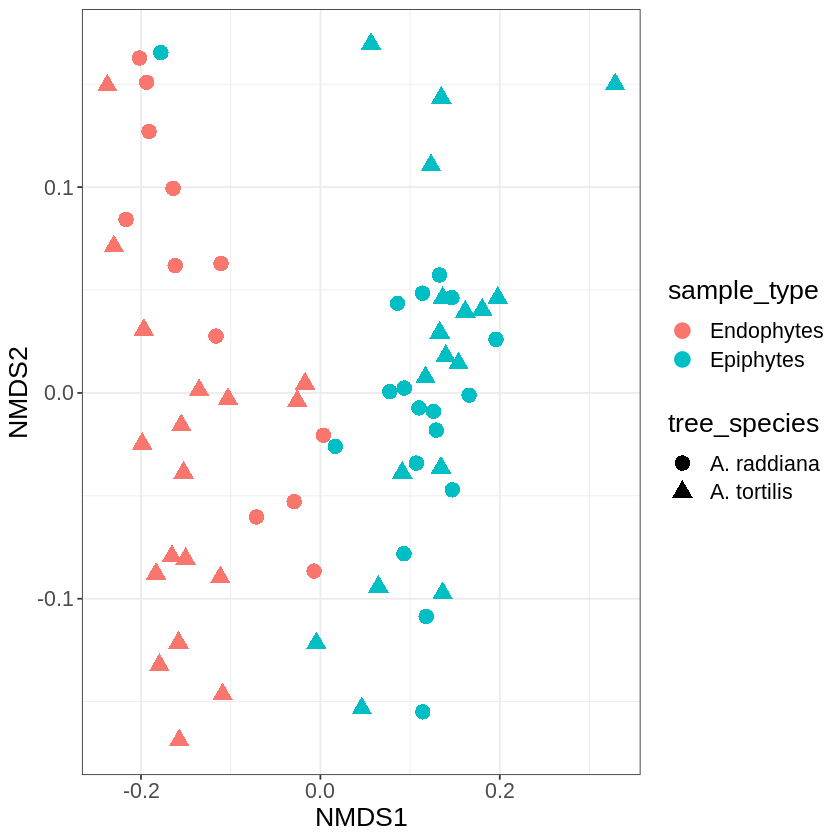

In [87]:
GP.ord <- ordinate(physeq_epi_endor, "NMDS", "bray")
#pdf('Figure 2A.pdf')
p<- plot_ordination(physeq_epi_endor, GP.ord, type="samples", color="sample_type",shape="tree_species")
p + theme_bw() + theme(text = element_text(size = 16)) + geom_point(size = 4)
#dev.off()

In [78]:
ps1t= transform_sample_counts(physeq_epi_endor, function(x) x / sum(x) )

In [79]:
ps1tr = filter_taxa(ps1t, function(x) sum(x) < 1, TRUE)

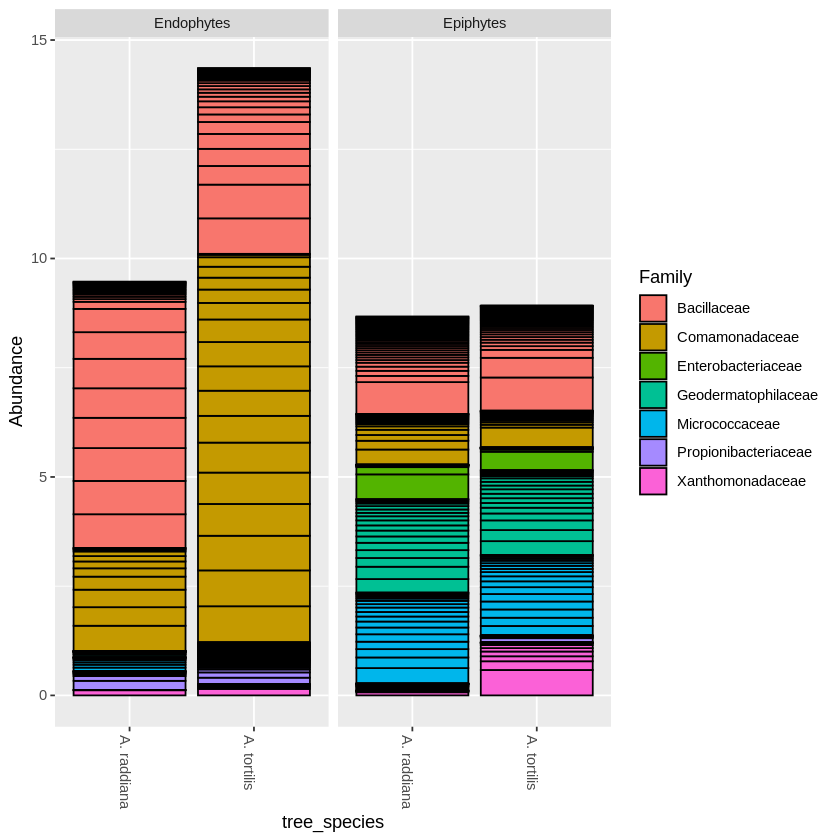

In [85]:
rmtaxa = taxa_names(ps1tr)
alltaxa = taxa_names(ps1t)
myTaxa = alltaxa[!alltaxa %in% rmtaxa]
ps2 <- prune_taxa(myTaxa,ps1t)
#pdf("Supp_Figure8.pdf")
#plot_bar(ps2, "Canopy", fill="Family", facet_grid=~Month)
plot_bar(ps2, "tree_species", fill="Family",facet_grid=~sample_type)
#dev.off()


# Table 2

In [15]:
summary(sample_data(physeq)$sample_type)
physeq_epi <- subset_samples(physeq, sample_type=="Epiphytes")
summary(sample_data(physeq_epi)$sample_type)

physeq_epi1 = subset_samples(physeq_epi, sample_sums(physeq_epi) > 1000, TRUE)
physeq_epir =rarefy_even_depth(physeq_epi1, sample.size = min(sample_sums(physeq_epi1)),
  rngseed = FALSE, replace = TRUE, trimOTUs = TRUE, verbose = TRUE)

sampledf_epir <- data.frame(sample_data(physeq_epir))


adonis(distance(physeq_epir, method="bray") ~ 
       season+month+shedding+
       month/tree_species+
       tree_species/Tree+
       tree_species/Canopy,
       permutation=999,data = sampledf_epir)

Endophytes  Epiphytes 
        30        107

Epiphytes 
      107

You set `rngseed` to FALSE. Make sure you've set & recorded
 the random seed of your session for reproducibility.
See `?set.seed`


...

1911OTUs were removed because they are no longer 
present in any sample after random subsampling


...




Call:
adonis(formula = distance(physeq_epir, method = "bray") ~ season +      month + shedding + month/tree_species + tree_species/Tree +      tree_species/Canopy, data = sampledf_epir, permutations = 999) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                     Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
season                3    2.5250 0.84167  4.3920 0.10338  0.001 ***
month                 5    3.3116 0.66233  3.4562 0.13558  0.001 ***
shedding              1    0.1821 0.18211  0.9503 0.00746  0.480    
tree_species          1    0.2598 0.25982  1.3558 0.01064  0.121    
month:tree_species    7    1.5428 0.22041  1.1501 0.06316  0.121    
tree_species:Tree     2    0.4759 0.23793  1.2416 0.01948  0.153    
tree_species:Canopy   4    0.7974 0.19936  1.0403 0.03265  0.365    
Residuals            80   15.3308 0.19164         0.62766           
Total               103   24.4255                 1.00000           
---
Signif. 

In [92]:

GP.ord <- ordinate(physeq_epir, "NMDS", "bray")
pdf('Figure4A.pdf')
p<- plot_ordination(physeq_epir, GP.ord, type="samples", color="Month",shape="season")
p + theme_bw() + theme(text = element_text(size = 16)) + geom_point(size = 4)
dev.off()

# x<- plot_ordination(physeq_epir, GP.ord, type="samples", color="sample_type", title="Sites")
# x + theme_bw() + theme(text = element_text(size = 16)) + geom_point(size = 4)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1970986 
Run 1 stress 0.2017551 
Run 2 stress 0.1972687 
... Procrustes: rmse 0.003944518  max resid 0.02884476 
Run 3 stress 0.2166652 
Run 4 stress 0.2105024 
Run 5 stress 0.2158806 
Run 6 stress 0.2190471 
Run 7 stress 0.1971014 
... Procrustes: rmse 0.000756124  max resid 0.004179618 
... Similar to previous best
Run 8 stress 0.2042106 
Run 9 stress 0.1971015 
... Procrustes: rmse 0.0004262842  max resid 0.003648646 
... Similar to previous best
Run 10 stress 0.2149563 
Run 11 stress 0.2041843 
Run 12 stress 0.2037292 
Run 13 stress 0.2226786 
Run 14 stress 0.1972552 
... Procrustes: rmse 0.003679518  max resid 0.02919758 
Run 15 stress 0.2037264 
Run 16 stress 0.1997216 
Run 17 stress 0.1972541 
... Procrustes: rmse 0.003622258  max resid 0.02875054 
Run 18 stress 0.2097308 
Run 19 stress 0.2031706 
Run 20 stress 0.1971169 
... Procrustes: rmse 0.001722676  max resid 0.01342364 
*** Solution reached


png 
  2

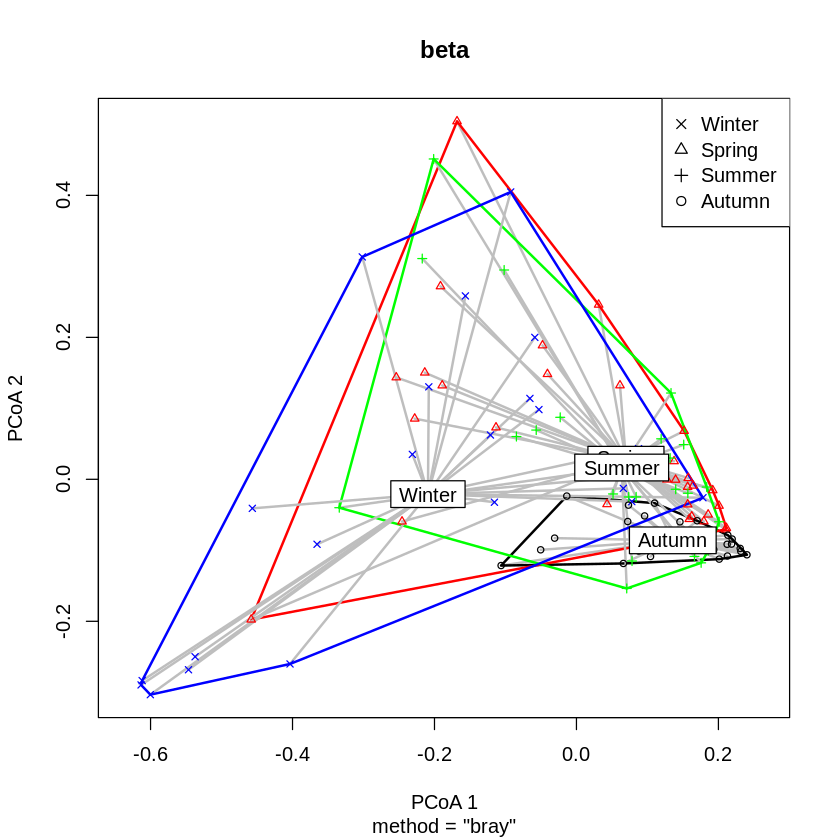

In [17]:
colfunc<-colorRampPalette(c("blue", "red","green","black"))

erie_bray <- phyloseq::distance(physeq_epir, method = "bray")
beta <- betadisper(erie_bray, sampledf_epir$season)
#pdf("epiphytes_season.pdf")

plot(beta,col=unique(colfunc(4)[(sampledf_epir$season)]),lwd=2)
legend("topright",legend=unique(sampledf_epir$season),pch=as.numeric(unique(sampledf_epir$season)))
#dev.off()



In [18]:
permutest(beta, pairwise = TRUE, permutations = 999)


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df  Sum Sq  Mean Sq      F N.Perm Pr(>F)    
Groups      3 0.29111 0.097036 7.5325    999  0.001 ***
Residuals 100 1.28823 0.012882                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
           Autumn     Spring     Summer Winter
Autumn            1.6000e-02 1.0000e-03  0.001
Spring 1.3314e-02            7.6900e-01  0.066
Summer 1.5268e-03 7.7247e-01             0.009
Winter 1.8702e-07 5.8658e-02 6.9053e-03       

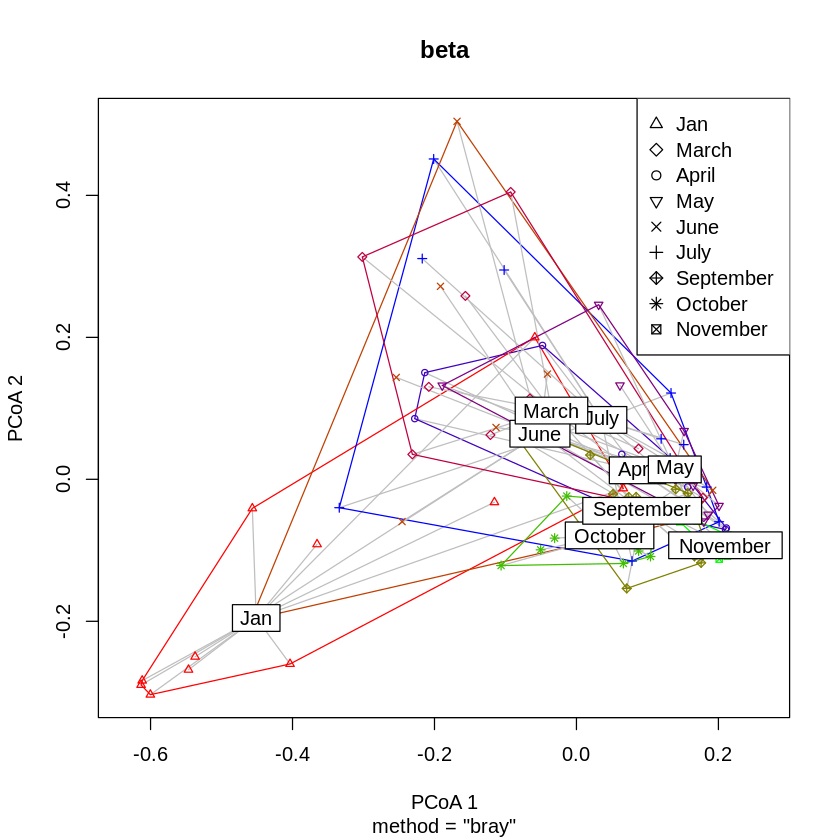

In [19]:
colfunc<-colorRampPalette(c("blue", "red","green"))

erie_bray <- phyloseq::distance(physeq_epir, method = "bray")
beta <- betadisper(erie_bray,sampledf_epir$month)
#pdf("epiphytes_month.pdf")
plot(beta,col=unique(colfunc(9)[(sampledf_epir$month)]))
legend("topright",legend=unique(sampledf_epir$month),pch=as.numeric(unique(sampledf_epir$month)))
#dev.off()



In [20]:
permutest(beta, pairwise = TRUE, permutations = 999)


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq  Mean Sq      F N.Perm Pr(>F)    
Groups     8 0.44553 0.055691 3.5214    999  0.001 ***
Residuals 95 1.50241 0.015815                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
               April        Jan       July       June      March        May
April                8.3100e-01 7.4900e-01 3.4800e-01 2.0800e-01 6.0900e-01
Jan       8.5762e-01            5.9100e-01 2.3900e-01 1.3400e-01 7.3500e-01
July      7.4563e-01 5.7038e-01            3.9200e-01 2.1200e-01 2.9500e-01
June      3.5891e-01 2.4672e-01 3.6992e-01            6.3000e-01 8.0000e-02
March     2.1233e-01 1.3813e-01 1.9071e-01 5.9870e-01            5.6000e-02
May       5.8982e-01 7.2540e-01 2.7076e-01 8.3986e-02 4.3962e-02           
November  2.6098e

In [60]:
ps1t= transform_sample_counts(physeq_epir, function(x) x / sum(x) )

In [61]:
ps1t


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2962 taxa and 104 samples ]
sample_data() Sample Data:       [ 104 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 2962 taxa by 7 taxonomic ranks ]

In [62]:
ps1tr = filter_taxa(ps1t, function(x) sum(x) < 1, TRUE)

denovo2478  denovo5430  denovo9010  denovo9909 denovo13396 denovo13717 
  12.194674    1.476584    5.816345    9.115702    2.057851    1.027548 
denovo15633 denovo21679 denovo23357 denovo24673 denovo25224 denovo31450 
   2.363636    4.505969   11.393021    4.216713    1.001837    2.138659

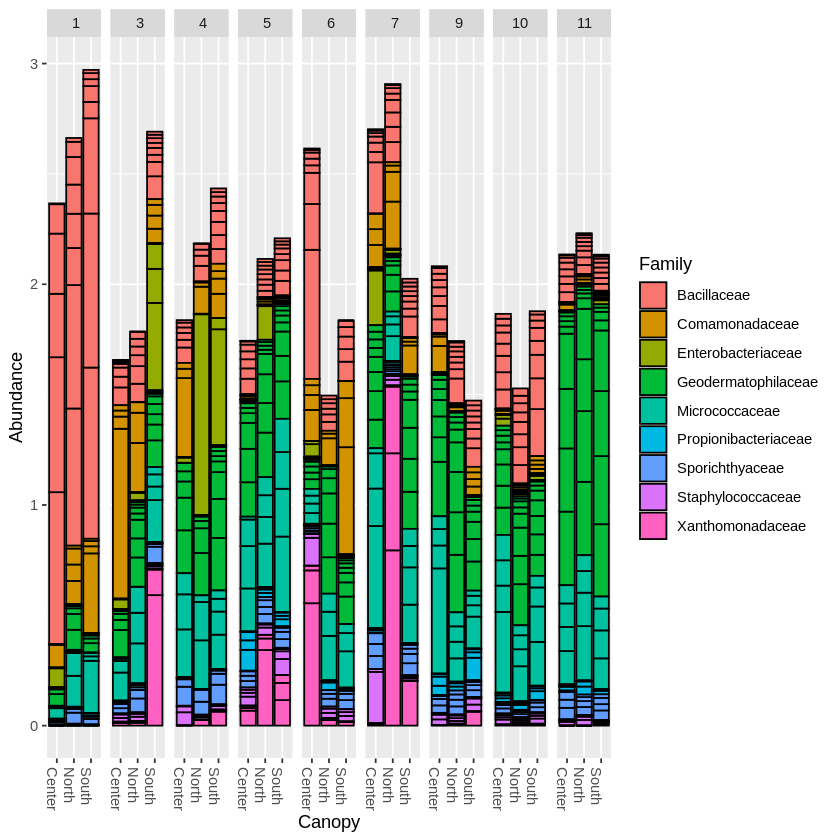

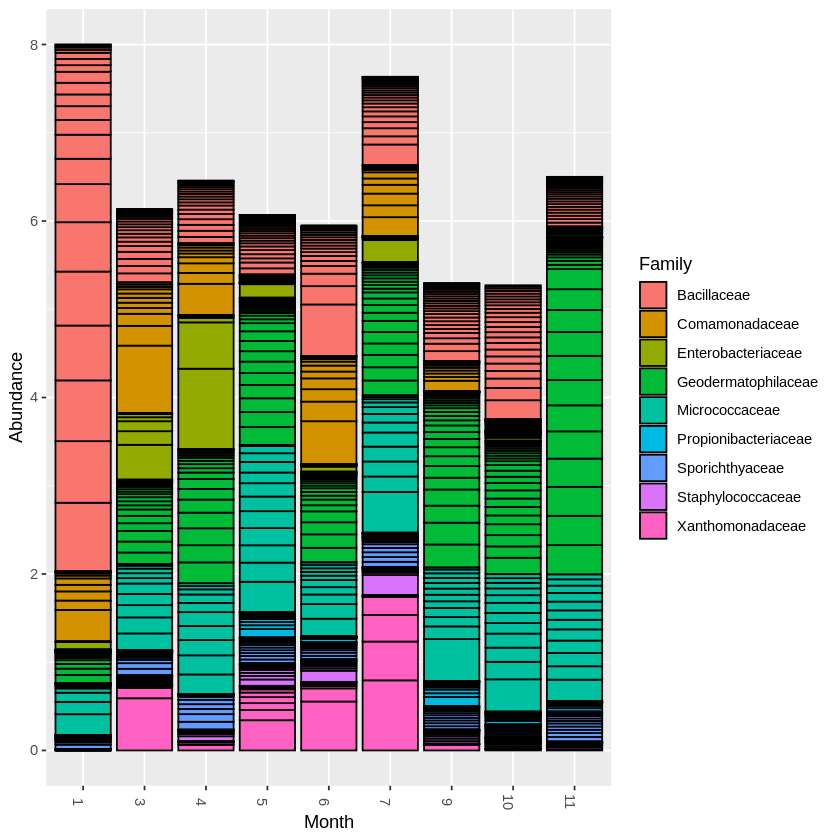

In [65]:
rmtaxa = taxa_names(ps1tr)
alltaxa = taxa_names(ps1t)
myTaxa = alltaxa[!alltaxa %in% rmtaxa]
ps2 <- prune_taxa(myTaxa,ps1t)
rowSums(otu_table(ps2))
#pdf("Supp_Figure5.pdf")
plot_bar(ps2, "Canopy", fill="Family", facet_grid=~Month)
#dev.off()
plot_bar(ps2, "Month", fill="Family")


# Table 3

In [25]:
summary(sample_data(physeq)$sample_type)
physeq_endo <- subset_samples(physeq, sample_type=="Endophytes")
summary(sample_data(physeq_endo)$sample_type)


Endophytes  Epiphytes 
        30        107

Endophytes 
        30

In [42]:
physeq_endo1 = subset_samples(physeq_endo, sample_sums(physeq_endo) > 1000, TRUE)
summary(sample_data(physeq_endo1)$sample_type)

physeq_endor =rarefy_even_depth(physeq_endo1, sample.size = min(sample_sums(physeq_endo1)),
  rngseed = FALSE, replace = TRUE, trimOTUs = TRUE, verbose = TRUE)

sampledf_endor <- data.frame(sample_data(physeq_endor))

# adonis(distance(physeq_endor, method="bray") ~ 
#        shedding+tree_species+season+month+
#        tree_species/season+tree_species/month,
#        permutation=999,data = sampledf_endor)


adonis(distance(physeq_endor, method="bray") ~ 
       shedding+tree_species+season+month+
       tree_species/Tree+
       season/tree_species+
       month/tree_species,
       permutation=999,data = sampledf_endor)



Endophytes 
        30

You set `rngseed` to FALSE. Make sure you've set & recorded
 the random seed of your session for reproducibility.
See `?set.seed`


...

4117OTUs were removed because they are no longer 
present in any sample after random subsampling


...




Call:
adonis(formula = distance(physeq_endor, method = "bray") ~ shedding +      tree_species + season + month + tree_species/Tree + season/tree_species +      month/tree_species, data = sampledf_endor, permutations = 999) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                    Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)  
shedding             1    0.5621 0.56210  4.0774 0.10632  0.037 *
tree_species         1    0.6177 0.61766  4.4804 0.11683  0.025 *
season               3    0.4328 0.14426  1.0465 0.08186  0.429  
month                5    1.0274 0.20548  1.4905 0.19434  0.206  
tree_species:Tree    2    0.1826 0.09132  0.6624 0.03455  0.614  
tree_species:season  3    0.5903 0.19676  1.4272 0.11165  0.206  
tree_species:month   2    0.2196 0.10978  0.7963 0.04153  0.482  
Residuals           12    1.6543 0.13786         0.31292         
Total               29    5.2867                 1.00000         
---
Signif. codes:  0 ‘**

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1543012 
Run 1 stress 0.1543012 
... Procrustes: rmse 6.801013e-05  max resid 0.0002238957 
... Similar to previous best
Run 2 stress 0.1543012 
... New best solution
... Procrustes: rmse 1.783471e-05  max resid 4.391655e-05 
... Similar to previous best
Run 3 stress 0.2096479 
Run 4 stress 0.1543012 
... Procrustes: rmse 7.471247e-05  max resid 0.0002369023 
... Similar to previous best
Run 5 stress 0.1543012 
... Procrustes: rmse 2.807349e-05  max resid 9.956843e-05 
... Similar to previous best
Run 6 stress 0.2096513 
Run 7 stress 0.1550985 
Run 8 stress 0.1543012 
... Procrustes: rmse 3.532678e-05  max resid 0.0001427875 
... Similar to previous best
Run 9 stress 0.1552486 
Run 10 stress 0.2214031 
Run 11 stress 0.1552494 
Run 12 stress 0.2104857 
Run 13 stress 0.1543012 
... Procrustes: rmse 9.954606e-05  max resid 0.0003148532 
... Similar to previous best
Run 14 stress 0.1543014 
... Procrustes: rmse 0.00

png 
  2

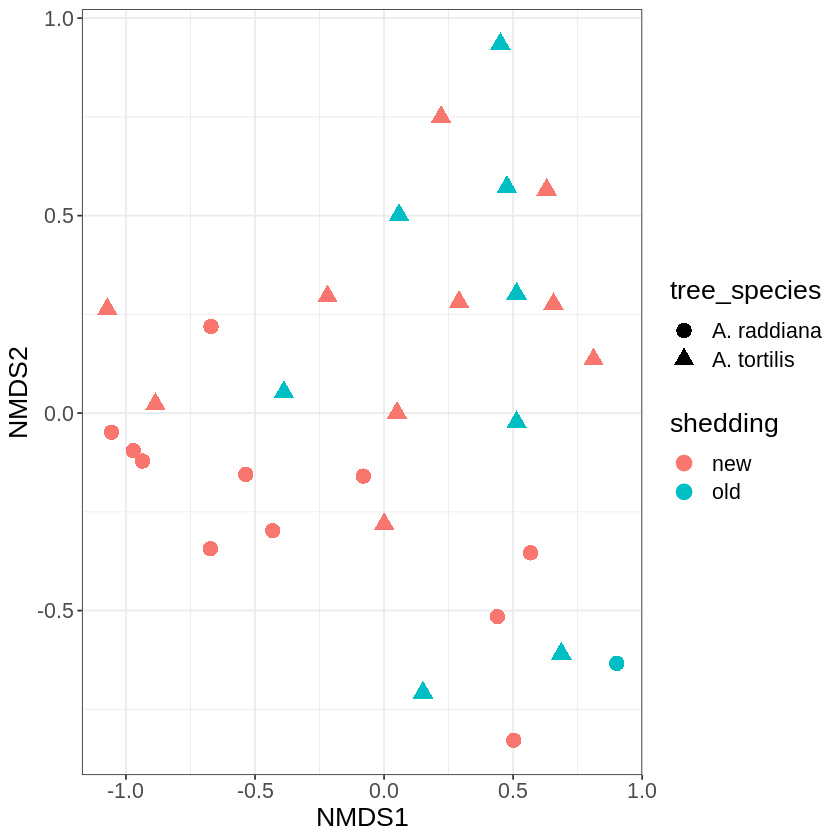

In [95]:
GP.ord <- ordinate(physeq_endor, "NMDS", "bray")
pdf('Figure 2B.pdf')
p<- plot_ordination(physeq_endor, GP.ord, type="samples", color="tree_species",shape="tree_species")
p + theme_bw() + theme(text = element_text(size = 16)) + geom_point(size = 4)
dev.off()


#pdf('Figure4B.pdf')
p<- plot_ordination(physeq_endor, GP.ord, type="samples", color="shedding",shape="tree_species")
p + theme_bw() + theme(text = element_text(size = 16)) + geom_point(size = 4)
#dev.off()



Square root transformation
Wisconsin double standardization
Run 0 stress 0.1741431 
Run 1 stress 0.1750602 
Run 2 stress 0.175403 
Run 3 stress 0.2045436 
Run 4 stress 0.174763 
Run 5 stress 0.2181894 
Run 6 stress 0.1749249 
Run 7 stress 0.1749249 
Run 8 stress 0.1740276 
... New best solution
... Procrustes: rmse 0.005015507  max resid 0.01938566 
Run 9 stress 0.2319045 
Run 10 stress 0.1742586 
... Procrustes: rmse 0.007208113  max resid 0.02096375 
Run 11 stress 0.2104771 
Run 12 stress 0.1754984 
Run 13 stress 0.1734758 
... New best solution
... Procrustes: rmse 0.01506752  max resid 0.05485286 
Run 14 stress 0.1745174 
Run 15 stress 0.1734759 
... Procrustes: rmse 8.589225e-05  max resid 0.0003248178 
... Similar to previous best
Run 16 stress 0.2241753 
Run 17 stress 0.2211214 
Run 18 stress 0.1755509 
Run 19 stress 0.1910716 
Run 20 stress 0.1735895 
... Procrustes: rmse 0.004491202  max resid 0.01887283 
*** Solution reached


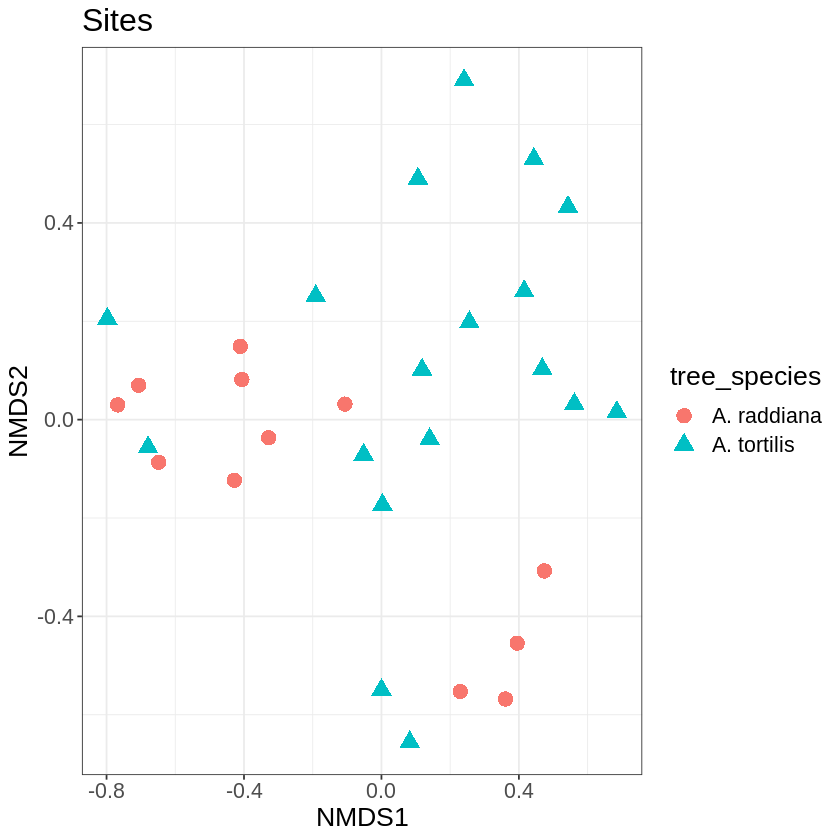

In [37]:
GP.ord <- ordinate(physeq_endor, "NMDS", "bray")
# #pdf('NMDS_DUST.pdf')
p<- plot_ordination(physeq_endor, GP.ord, type="samples", color="tree_species", title="Sites",shape="tree_species")
p + theme_bw() + theme(text = element_text(size = 16)) + geom_point(size = 4)


In [47]:
erie_bray <- phyloseq::distance(physeq_endor, method = "bray")
beta <- betadisper(erie_bray, sampledf_endor$shedding)
pdf("Supp Figure 6A.pdf")
plot(beta)
dev.off()

erie_bray <- phyloseq::distance(physeq_endor, method = "bray")
beta <- betadisper(erie_bray, sampledf_endor$tree_species)
pdf("Supp Figure 6B.pdf")
plot(beta)
dev.off()

png 
  2

png 
  2

In [66]:
ps1t= transform_sample_counts(physeq_endor, function(x) x / sum(x) )

In [69]:
ps1tr = filter_taxa(ps1t, function(x) sum(x) < 1, TRUE)

In [76]:
rmtaxa = taxa_names(ps1tr)
alltaxa = taxa_names(ps1t)
myTaxa = alltaxa[!alltaxa %in% rmtaxa]
ps2 <- prune_taxa(myTaxa,ps1t)
pdf('supp figure 7A.pdf')
plot_bar(ps2, "Family", fill="Family", facet_grid=~shedding)
dev.off()

png 
  2

In [77]:
pdf('supp figure 7B.pdf')
plot_bar(ps2, "Family", fill="Family", facet_grid=~tree_species)
dev.off()

png 
  2

In [ ]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
#t_otus<-decostand(t_otus,method="total")

map<-read.table("F649_R889_map_r_MS.csv",row.names=1,sep=",",header=T)
map2<-map[map$Canopy=="South",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")


p<-p[p$sample_type=="Endophytes",]
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
pp<-p[,((dim(map2)[2])+1):dim(p)[2]]
ppp<-pp[,!!colSums(pp)]
l<-anosim((as.matrix((vegdist(ppp,distance="bray")))),grouping=p$tree_species)

NMDS_bray<-metaMDS(ppp,distance="bray",k=2,trymax=10000,autotransform=F)
zz<-scores(NMDS_bray,display="site")


colfunc<-colorRampPalette(c("blue", "red"))

#pdf("Figure 2B_Endo.pdf")
 plot(NMDS_bray,dis="site",type="n")
 points(NMDS_bray,pch=as.numeric(p$tree_species),cex=1.5,lwd=1.5, col=colfunc(2)[p$shedding])
legend(x=-0.9,y=0.5,legend=unique(p$tree_species),pch=unique(as.numeric(p$tree_species)),pt.cex=1.5,lwd=1.5,lty=NA)
text(y=1,x=1,label=paste("Stress=",round(NMDS_bray$stress,digits=4)))
text(y=1.3,x=0.6,label=paste("p-value=",l$signif))
# #text(y=-0.9,x=0.8,label=paste("p-value=",l_exo$signif),col="red")
# title("Endosphere  bacterial communities (South canopy face)",font.main=1,cex.main=1,adj=0)
#dev.off()


l$signif